# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Цели исследования:</b>

По данным стоимости квартир отследить аномалии и мошенническую деятельность, для этого нужно

 - Установить параметры, которые позволят определять рыночную стоимость объектов недвижимости.
 - Подготовить данные для построения автоматизированную систему, которая по установленным параметрам позволит отсележивать аномалии и мошенническую деятельность

<b>Ход исследования:</b> 

Данные для исследования предоставлены сервисом Яндекс.Недвижимость через файл <code>real_estate_data.csv</code>. С данными необходимо предварительно озанкомиться и оценить на предмет валидности и адекватности, также они, вероятно, требуют предобработки с целью устранения ошибок и аномалий, после устранения которых будет возможен их исследовательский анализ.

Иследование будет включать в себя следующие шаги:

 - Открытие и изучения файла
 - Предобработка данных (исправление и заполнение пропусков)
 - Добавление в данные новых показательных параметров, производных от имеющихся
 - Исследовательский анализ, включающий решение поставленных задач:
     - Исследование скорости продажи квартир
     - Установление факторов, влияющих на стоимость квартир
     - Установление средней цены кв. м. в 10 населенных пунктах с наибольшим количеством объявлений
     - Вычисление зависимости средней цены квартиры в г. Санкт-Петербург от её удаленности от центра
 - Общие выводы
   
<b>Результаты исследования:</b>
- Проведена предобработка и исследовательский анализ данных. Сгенерированы дополнительные данные.
- Изучена скорость продажи недвижимости и показаны факторы отличия быстро и медленно продаваемых объектов.
- Выявлены факторы, больше всего влияющие на стоимость объектов недвижимости.
- Установлена линейная зависимость стоимости квартиры от расстояния до центра города. 


## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/panther/Documents/Deep Learning/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# привожу заголовки в стиль питона, время размещения (first_day_exposition) в datetime

data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000':'parks_around_3',
                            'ponds_around3000':'ponds_around_3'}
                  )
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [4]:
# русские названия колонок

ru_name =  {'airports_nearest': 'Расстояние до бл. АП',
                'balcony': 'Число балконов',
                'ceiling_height': 'Высота потолков',
                'city_centers_nearest': 'Расстояние до центра города',
                'days_exposition': 'Срок размещения объявления',
                'first_day_exposition': 'Дата публикации',
                'floor': 'Этаж',
                'floors_total': 'Всего этажей в доме',
                'is_apartment': 'Апартаменты',
                'kitchen_area': 'Площадь кухни',
                'last_price': 'Цена при снятии объявл.',
                'living_area': 'Жилая площадь',
                'locality_name': 'Название нас. п.',
                'open_plan': 'Свободная планировка',
                'parks_around_3': 'Число парков в радиусе 3 км',
                'parks_nearest': 'Расстояние до ближайшего парка',
                'ponds_around_3': 'Число водоёмов в радиусе 3 км',
                'ponds_nearest': 'Расстояние до ближайшего водоёма',
                'rooms': 'Число комнат',
                'studio': 'Квартира-студия',
                'total_area': 'Общая площадь квартиры',
                'total_images': 'Число фотографий квартиры',
                'sq_m_price': 'Цена квадратного метра',
                'day_of_week': 'День недели публикации объявления',
                'month': 'Месяц публикации объявления',
                'year': 'Год публикации объявления',
                'floor_type': 'Тип этажа квартиры',
                'city_centers_kms': 'Расстояние до центра города'
               }

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

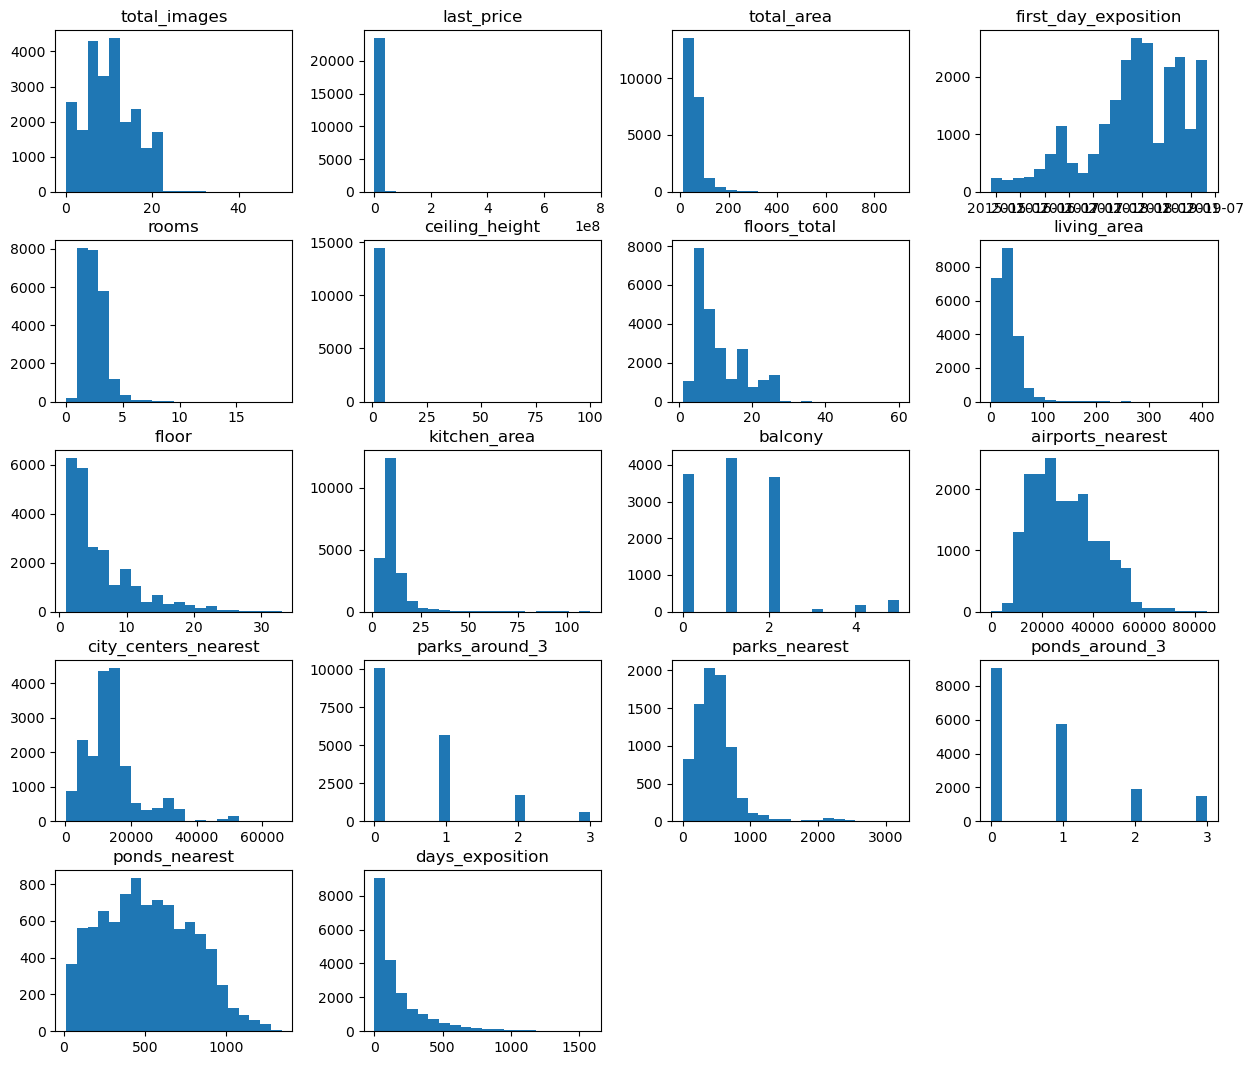

In [7]:
# гистограммы по всем колонкам
data.hist(figsize=(15, 13), bins=20, grid=False);

In [8]:
# поиск явных дубликатов строк

data.duplicated().sum()

0

### Выводы по шагу "открытие файла и изучение информации"

Данные открыты и прочитаны в датафрейм <code>data</code> с применением разделителя табуляцие ('\t').

В данных 21 колонка из которых одна текстовая - <code>locality_name</code>, три булевы - <code>is_apartment, studio, open_plan</code> и одна формата дат, остальные - разные типы цифровых, кодирующие категориальные, и численные значения.

Метод <code>.info()</code> показывает, что pandas не всегда верно распознал тип значений в колонках. Так тип <i>datetime</i> в колонке <code>'first_day_exposition'</code> пришлось корректировать вручную. Целочисленные типы были приведены pandas во <i>float64</i>, потому что в них пропуски (<i>NaN</i> имеют тип <i>float</i> в pandas), также булев признак <code>is_apartment</code> тоже был распознан pandas как <i>object</i>. После заполнения пробелов эти ошибки в типах будут скорректированы.

## Предобработка данных

### Заполнение пропусков

In [9]:
# Считаю NaN

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3           5518
parks_nearest           15620
ponds_around_3           5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
round(data.isna().mean()*100,)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          39.0
floors_total             0.0
living_area              8.0
floor                    0.0
is_apartment            88.0
studio                   0.0
open_plan                0.0
kitchen_area            10.0
balcony                 49.0
locality_name            0.0
airports_nearest        23.0
city_centers_nearest    23.0
parks_around_3          23.0
parks_nearest           66.0
ponds_around_3          23.0
ponds_nearest           62.0
days_exposition         13.0
dtype: float64

В СССР планировка часто была типовая и завязана на этажность зданий. Поэтому сгруппирую данные по высоте потолков по признаку количества этажей. Но перед такой группировкой надо устранить пробелы в высоте домов (количестве этажей, <code>floors_total</code>)


In [11]:
# заполняю пропуски в этажности дома медианным значением группы по этажу объявления

data['floors_total'] = data.groupby('floor')['floors_total'].transform(lambda x: x.fillna(x.median()))
data['floors_total'].isna().sum() # проверяю, все ли пропуски заполнились

0

In [12]:
# заполняю пропуски в высоте потолка медианным значением группы по этажности дома

data['ceiling_height'] = data.groupby('floors_total')['ceiling_height'].transform(lambda x: x.fillna(x.median())) 
data['ceiling_height'].isna().sum()

1

Иногда интепретатор здесь показывает предупреждение, это из-за единичных случаев в группе (когда count вернул 1),(то есть невозможно посчитать медиану, в данных это строка "33.0"). Заполняю такие пропуски медианой по всем значениям (<b>дальше в аналогичных случаях поступаю также</b>):

In [13]:
ceiling_median = data['ceiling_height'].median()

data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)
data['ceiling_height'].isna().sum()

0

In [14]:
# допущение: если помещение - аппартаменты, то размещавший объявление это отмечал (в данных - True)
# а если нет, то пропускал, либо ставил False. Заменяю пропуски на False

data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [15]:
# пропуски в жилой площади заполняю медианным значением группы по количеству комнат

data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))
data['living_area'].isna().sum()

0

In [16]:
# аналогично для площади кухни

data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.median()))
data['kitchen_area'].isna().sum()

197

Не все кухни обработались, ниже решение:

In [17]:
data.loc[data['kitchen_area'].isna(), ['rooms', 'studio']].mean()

rooms     0.000000
studio    0.700508
dtype: float64

Видно, что не обработались квартиры с 0 комнат и по большей части это квартиры-студии (у всех <i>NaN</i> количество комнат - 0, то есть кухня совмещена с жилым помещением, в 70% случаев эти помещения уже обозначены как <i>studio</i>). Можно сразу исправить две неточности - заменить <i>NaN</i> на 0 и исправить 30% значений <i>studio</i> с <i>False</i> на <i>True</i>, если площадь меньше максимальной для студий. 

In [18]:
# корректирую помещения с нулем комнат в студии, а пропуски в площади кухонь в этих студиях в 0
max_area_studio = data[data['studio'] == True]['total_area'].max()

data.loc[data['kitchen_area'].isna(), ['studio', 'kitchen_area']] = [True, 0]

data['kitchen_area'].isna().sum()

0

In [19]:
# допущение: если не указано количество балконов, то их скорее всего нет
# заполняю пропуски нулем

data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [20]:
# заполняю пропуски нетипичным значением, вне границ разброса

data['airports_nearest'] = data['airports_nearest'].fillna(-999)
data['airports_nearest'].isna().sum()

0

In [21]:
# заполняю пропуски нетипичным значением, вне границ разброса

data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-999)
data['city_centers_nearest'].isna().sum()

0

In [22]:
# допущение: пропуски в данных потому, что парков в радиусе 3км нет 
# поэтому разместитель объявления оставил графу пустой
# заменяю пропуски на 0

data['parks_around_3'] = data['parks_around_3'].fillna(0)
data['parks_around_3'].isna().sum()

0

Проверяю пары "ближайшего парка" и "кол-ва парков в радиусе 3км" с целью заполнить пропуски в "ближайших парках" значением 3км, если есть хоть один парк в этом радиусе. 

In [23]:
data.loc[(data['parks_around_3'] > 0) & (data['parks_nearest'].isna()), ['parks_around_3', 'parks_nearest']].count()

parks_around_3    0
parks_nearest     0
dtype: int64

Но таких пар нет, поэтому просто заполняю пропуски экстремальным значением вне типичного разброса:

In [24]:
# заполняю пропуски нетипичным значением, вне границ разброса 

data['parks_nearest'] = data['parks_nearest'].fillna(-999)
data['parks_nearest'].isna().sum()

0

In [25]:
# допущение: пропуски в данных потому, что прудов в радиусе 3км нет 
# поэтому разместитель объявления оставил графу пустой
# заменяю пропуски на 0

data['ponds_around_3'] = data['ponds_around_3'].fillna(0)
data['ponds_around_3'].isna().sum()

0

Аналогично проверке для парков. Смотрю, есть ли одновременно в расстоянии до пруда пропуски и пруды в радиусе 3км: 

In [26]:
data.loc[(data['ponds_around_3'] > 0) & (data['ponds_nearest'].isna()), ['ponds_around_3', 'ponds_nearest']].count()

ponds_around_3    0
ponds_nearest     0
dtype: int64

In [27]:
# заполняю пропуски нетипичным значением, вне границ разброса 

data['ponds_nearest'] = data['ponds_nearest'].fillna(-999)
data['ponds_nearest'].isna().sum()

0

In [28]:
# заполняю пропуски нетипичным значением, вне границ разброса 

data['days_exposition'] = data['days_exposition'].fillna(-999)
data['days_exposition'].isna().sum()

0

In [29]:
# после обработки всех столбцов, кроме locality_name, проверяю результат

data.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         0
city_centers_nearest     0
parks_around_3           0
parks_nearest            0
ponds_around_3           0
ponds_nearest            0
days_exposition          0
dtype: int64

### Корректировка типа данных в колонках

In [30]:
data = data.astype({'last_price':'int64', 'floors_total':'int64', 'is_apartment':'bool', 
                    'balcony':'int64','airports_nearest': 'int64', 'city_centers_nearest': 'int64',
                    'parks_around_3':'int64', 'parks_nearest': 'int64', 'ponds_around_3':'int64',
                    'ponds_nearest': 'int64', 'days_exposition':'int64'}, errors='ignore')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Корректировка неявных дубликатов в названиях населенных пунктов

In [32]:
data['locality_name'] = data['locality_name'].str.replace('ё','е').str.extract(r'([А-Я].*)')

# проверка
data['locality_name'].value_counts().to_dict()

{'Санкт-Петербург': 15721,
 'Мурино': 590,
 'Кудрово': 472,
 'Шушары': 440,
 'Всеволожск': 398,
 'Пушкин': 369,
 'Колпино': 338,
 'Парголово': 327,
 'Гатчина': 307,
 'Выборг': 237,
 'Петергоф': 201,
 'Сестрорецк': 183,
 'Красное Село': 178,
 'Новое Девяткино': 144,
 'Сертолово': 142,
 'Ломоносов': 133,
 'Кириши': 125,
 'Бугры': 114,
 'Сланцы': 112,
 'Волхов': 111,
 'Тосно': 104,
 'Кингисепп': 104,
 'Кронштадт': 96,
 'Никольское': 94,
 'Коммунар': 89,
 'Сосновый Бор': 87,
 'Кировск': 84,
 'Отрадное': 80,
 'Янино-1': 68,
 'Металлострой': 66,
 'Приозерск': 66,
 'Старая': 64,
 'Шлиссельбург': 57,
 'Луга': 56,
 'Тихвин': 49,
 'Стрельна': 44,
 'Тельмана': 41,
 'Рощино': 39,
 'Павловск': 38,
 'Волосово': 36,
 'Свердлова': 36,
 'Романовка': 36,
 'Кузьмоловский': 35,
 'Мга': 33,
 'Сиверский': 29,
 'Ивангород': 28,
 'Новоселье': 28,
 'Щеглово': 24,
 'Зеленогорск': 24,
 'Сясьстрой': 24,
 'Новый Свет': 22,
 'Вырица': 22,
 'Синявино': 21,
 'Вартемяги': 20,
 'Токсово': 20,
 'Понтонный': 20,
 'Лодейн

### Исправление выбивающихся значений и аномалий

##### Колонка total_images

In [33]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [34]:
# проверяю, что это за недвижимость с 50 изображениями на объявление

data[data['total_images'] == 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
9778,50,11000000,87.0,2017-10-25,2,2.75,25,32.5,11,False,...,31.0,5,Санкт-Петербург,9586,11649,0,-999,0,-999,3
12667,50,20500000,76.0,2017-12-10,3,2.75,20,47.0,16,False,...,29.0,0,Санкт-Петербург,50812,16141,0,-999,0,-999,5
17396,50,14500000,119.7,2017-12-02,4,4.00,4,87.5,3,False,...,13.5,0,Санкт-Петербург,24375,2410,1,551,2,617,106


Помимо необычно большого количества изображений других отклонений в данных не найдено.

Немного странно видеть объявление с 50 изображениями не самых дорогих и больших квартир, но исправлять я это не считаю нужным. Может, в самом деле не было предела на количество изображений в объявлении.

##### Колонка last_price

In [35]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Неадекватно малая минимальная цена цена. Проверяю:

In [36]:
data.sort_values(by='last_price', ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.50,0,Санкт-Петербург,36421,9176,1,805,0,-999,8
17456,7,430000,30.4,2019-04-22,1,2.70,2,16.0,1,False,...,6.00,0,Сланцы,-999,-999,0,-999,0,-999,-999
14911,5,430000,54.0,2018-06-26,2,2.80,3,30.5,3,False,...,8.80,0,Свирь,-999,-999,0,-999,0,-999,44
16274,18,440000,40.0,2018-07-10,1,2.55,5,17.6,1,False,...,9.04,0,Старополье,-999,-999,0,-999,0,-999,45
17676,0,450000,36.5,2018-02-01,1,2.55,5,17.3,4,False,...,8.50,1,Ям-Тесово,-999,-999,0,-999,0,-999,120


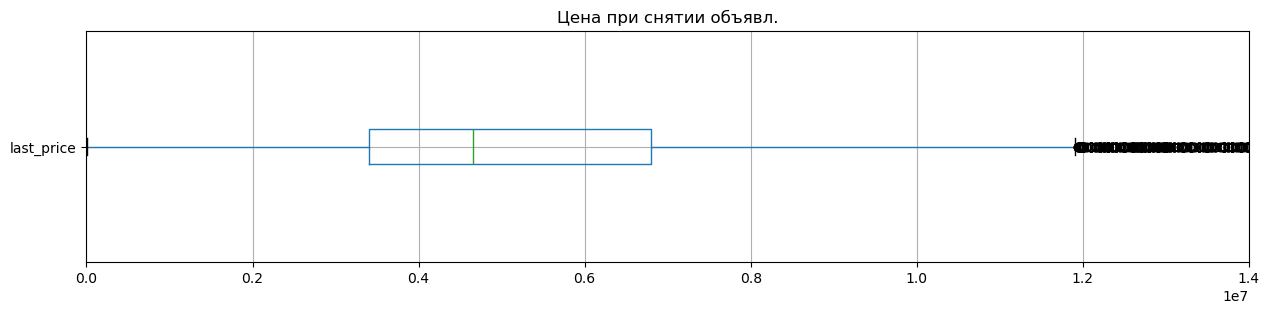

In [37]:
plt.figure(figsize=(15, 3))
data.boxplot(column=['last_price'], vert=False).set_title(ru_name['last_price'])
plt.xlim(0, 14000000);

Так и есть, за такую квартиру цена неадекватна. Так как восстановить реальную цену не представляется возможным, удаляю строку.

In [38]:
data = data.drop(8793) # удаляю строку по индексу

In [39]:
# проверка

data['last_price'].describe()

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Теперь минимальная цена адекватна, но подозрение вызывает максимальная, которая на 2 порядка выше 75-го перцентиля. Проверяю максимальные цены:

In [40]:
data.sort_values(by='last_price', ascending=False).head()[['last_price', 'total_area', 'city_centers_nearest']]

,last_price,total_area,city_centers_nearest
12971,763000000,400.0,3956
19540,420000000,900.0,7877
14706,401300000,401.0,2389
1436,330000000,190.0,1197
15651,300000000,618.0,5297


Учитывая площадь помещения и расстояние до центра города, больше похоже на элитную недвижимость, чем на ошибку в данных, игнорирую эти выбросы.

##### Колонка total_area

In [41]:
data['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Минимальное и максимальное значения общей площади выглядят подозрительно. Проверяю:

In [42]:
data.sort_values(by='total_area', ascending=False).head()[['last_price', 'total_area', 'rooms']]

,last_price,total_area,rooms
19540,420000000,900.0,12
12859,140000000,631.2,7
3117,140000000,631.0,7
15651,300000000,618.0,7
5358,65000000,590.0,15


In [43]:
data.sort_values(by='total_area', ascending=True).head()[['last_price', 'total_area', 'rooms']]

,last_price,total_area,rooms
19904,2400000,12.0,1
17961,1400000,13.0,1
19807,3800000,13.0,1
19546,1850000,13.0,1
19558,1686000,13.2,1


Все в порядке, минимальное и максимальное значения не выбиваются из ряда соседних.

##### Колонка living_area

In [44]:
data['living_area'].describe()

count    23698.000000
mean        34.322080
std         21.701079
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Странное минимальное значение жилой площади. Проверяю:

In [45]:
data.sort_values(by='living_area', ascending=True).head(10)[['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']]

,last_price,total_area,living_area,kitchen_area,rooms,studio
13915,6350000,52.0,2.0,9.0,2,False
21758,2330000,23.0,2.0,0.0,0,True
3242,4440000,41.0,3.0,11.0,1,False
23574,64990000,139.0,3.0,16.0,3,False
17582,2680000,22.0,5.0,0.0,0,True
21943,6100000,77.6,5.4,9.8,4,False
16431,3799000,31.0,6.0,17.0,1,False
19251,4050000,33.0,6.5,18.0,1,False
23208,4800000,37.0,8.0,22.0,1,False
20994,8900000,50.6,8.0,31.0,2,False


Согласно СНиП минимальная площадь комнаты жилого помещения (не относящегося к помещениям временного размещения), должна быть не менее 8 квадратных метров. Так как реальную площадь жилых помещений не восстановить, заменяю значения <code>living_area</code>, которые не удовлетворяют СНиП, на минимальные по формуле (кол-во комнат * 8)

In [46]:
data.loc[(data['living_area'] < 8 * data['rooms']) & (8 * data['rooms'] < data['total_area']), 'living_area'
] = 8 * data['rooms']

data.loc[data['living_area'] < 8, 'living_area'] = 8

In [47]:
data.sort_values(by='living_area', ascending=True).head(10)[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']
]

,last_price,total_area,living_area,kitchen_area,rooms,studio
16431,3799000,31.0,8.0,17.0,1,False
23208,4800000,37.0,8.0,22.0,1,False
17582,2680000,22.0,8.0,0.0,0,True
3242,4440000,41.0,8.0,11.0,1,False
21758,2330000,23.0,8.0,0.0,0,True
19251,4050000,33.0,8.0,18.0,1,False
114,4000000,21.4,8.3,6.3,1,False
21505,4100000,35.3,8.5,16.1,1,False
17248,5300000,33.0,8.9,16.1,1,False
680,7200000,43.0,9.0,23.0,1,False


##### Колонка kitchen_area

In [48]:
data['kitchen_area'].describe()

count    23698.000000
mean        10.376243
std          5.716930
min          0.000000
25%          7.200000
50%          9.040000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Нулевая площадь кухни характерна для студий, здесь ничего странного. Площадь в 112 кв. м. также не ошибка, такая площадь кухни у квартиры общей площадью 900 кв. м.:

In [49]:
data.sort_values(by='kitchen_area', ascending=False).head()[
    ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']
]

,last_price,total_area,living_area,kitchen_area,rooms,studio
19540,420000000,900.0,409.7,112.0,12,False
20215,85000000,249.7,72.0,107.0,3,False
2489,12500000,255.0,153.9,100.7,3,False
5358,65000000,590.0,409.0,100.0,15,False
16239,82400000,181.1,58.2,93.2,3,False


##### Колонка floors_total

In [50]:
data['floors_total'].describe()

count    23698.000000
mean        10.681155
std          6.598867
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Cамое высокое жилое здание в Санкт-Петербурге - жилой комплекс «Князь Александр Невский»
Адрес: проспект Обуховской обороны, 138. В нём 37 этажей, поэтому исправляю все, что выше этого значения.

In [51]:
data[data['floors_total'] > 37]['floors_total']

2253     60
16731    52
Name: floors_total, dtype: int64

Допущение: высота потолка действиетльно верна, переписываю неверные данные медианным количеством этажей по группе строений с такой же высотой потолка.


In [52]:
data.loc[2253, 'floors_total'] = data[data['floor'] >= 4].groupby('ceiling_height')['floors_total'].median().loc[2.88].astype(int)
data.loc[16731, 'floors_total'] = data[data['floor'] >= 18].groupby('ceiling_height')['floors_total'].median().loc[2.65].astype(int)

data.loc[[2253, 16731]]['floors_total']

2253     20
16731    25
Name: floors_total, dtype: int64

##### Колонка ceiling_height

In [53]:
data['ceiling_height'].describe()

count    23698.000000
mean         2.735671
std          0.994314
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

По данным выше заметно сразу несколько проблем: минимальная высота потолка ниже допустимых норм по СНиП для жилых помещений (минимум 2,5 метра). Максимальная высота в 100м нереалистична, часто встречаются высоты потолков в диапазоне 26-32, что похоже на ошибку в разряде при записи данных для высот 2.6 - 3.2 метра. Корректирую эти ошибки. 

In [54]:
data['ceiling_height'] = data['ceiling_height'].mask(
    (data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 40), data['ceiling_height']/10
)

data['ceiling_height'] = data['ceiling_height'].mask(
    data['ceiling_height'] > 40 , ceiling_median
)

data['ceiling_height'] = data['ceiling_height'].mask(data['ceiling_height'] < 2.5, ceiling_median)


Проверяю резултаты на диаграмме разброса:

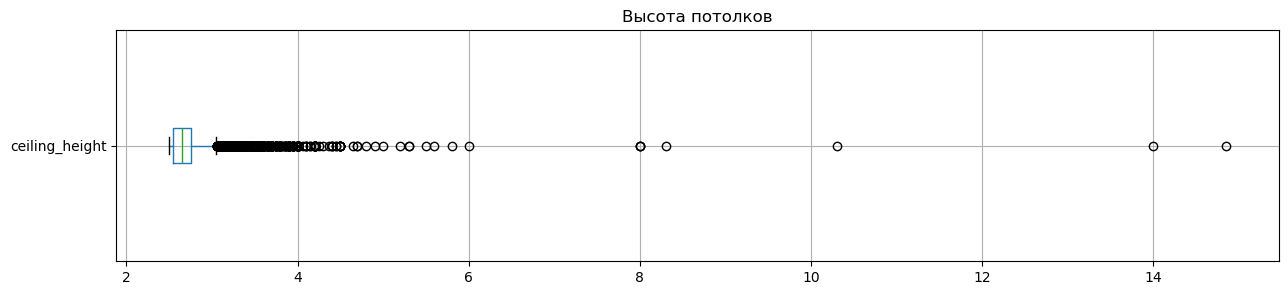

In [55]:
plt.figure(figsize=(15, 3))
data.boxplot(column=['ceiling_height'], vert=False).set_title(ru_name['ceiling_height']);

По-прежнему странная картина. Как правило в обычных многоквартирных домах не встречается потолков выше 4 м. И хоть на диаграмме разброса значения выше 6 м тоже выглядят как выбросы, 6 метров - это много.

Но этому может быть объяснение - это может быть элитная недвижимость, расположенная на последнем этаже, т.н. пентхаусы, для пентхаусов характерна высота потолков от 3,5 до 10 м. Поэтому провожу еще одну коррекцию, для чего понадобится критерии по цене, свойственной элитному сегменту недвижимости, и по принадлежности этажа к последнему:

In [56]:
# ввожу в исходный датафрейм новую колонку с ценами за квадратный метр помещения
data['sq_m_price'] = data['last_price'] / data['total_area']

# исходя из предположения, что пентхаусы это элитная недвижимость
# считаю, на какую цену кв. м. приходится 75-й перцентиль, после которого цену кв. м. можно считать высокой
sqmp_quant_75 = data['sq_m_price'].quantile(0.75)
sqmp_quant_75

114257.79286073403

In [57]:
# если высота больше 4 метров, но (этаж не последний или стоимость кв. м. меньше sqmp_quant_75)
# то корректирую "высоту потолка" до медианного значения

data['ceiling_height'] = data['ceiling_height'].mask(
    (data['ceiling_height'] > 4) &
    (
        (data['floor'] < data['floors_total']) | (data['sq_m_price'] < sqmp_quant_75)
    ), ceiling_median
)

Опять проверяю:

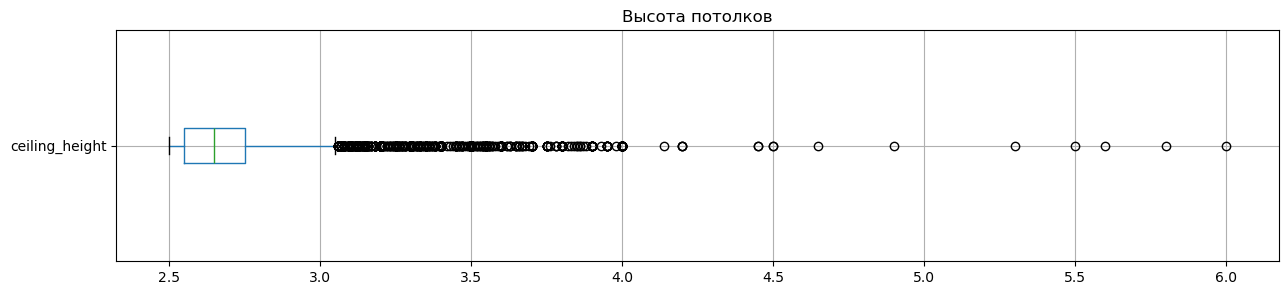

In [58]:
plt.figure(figsize=(15, 3))
data.boxplot(column=['ceiling_height'], vert=False).set_title(ru_name['ceiling_height']);

Теперь правдоподобно.

##### Колонка rooms

In [59]:
data['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нулевое значение характерно для студий. В остальном странностей нет. 

##### Колонка first_day_exposition                

In [60]:
data['first_day_exposition'].describe()

count                            23698
mean     2017-11-08 21:25:10.304666880
min                2014-11-27 00:00:00
25%                2017-05-12 06:00:00
50%                2017-12-12 00:00:00
75%                2018-08-25 18:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Странных значений нет

##### Колонка floor                    


In [61]:
data['floor'].describe()

count    23698.000000
mean         5.891552
std          4.883775
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Также нет странных значений

##### Колонка is_apartment             


In [62]:
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    23648
True        50
Name: is_apartment, dtype: int64

Колонка булевых значений. Никаких странностей.

##### Колонка studio                   


In [63]:
data.groupby('studio')['studio'].count()

studio
False    23490
True       208
Name: studio, dtype: int64

Аналогично.

##### Колонка open_plan                           


In [64]:
data.groupby('open_plan')['open_plan'].count()

open_plan
False    23631
True        67
Name: open_plan, dtype: int64

Аналогично.

##### Колонка balcony                 


In [65]:
data['balcony'].describe()

count    23698.000000
mean         0.591105
std          0.959311
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Квартиры без балконов - не редкость. А вот сразу 5 - надо проверять:

In [66]:
data.sort_values(by='balcony', ascending=False).head(20)[['balcony', 'last_price', 'total_area']].sort_values(by='total_area')

,balcony,last_price,total_area
22869,5,15000000,25.0
19297,5,1300000,43.4
4029,5,2500000,56.5
15998,5,4000000,57.0
12139,5,7585000,58.0
22538,5,6870000,67.0
21901,5,6750000,70.2
2011,5,6650000,72.7
20375,5,4900000,74.5
9015,5,7000000,79.6


Вряд ли у квартиры площадью 25 кв. м. может быть 5 балконов.

Выясняю типичное распределение "общей площади" квартиры по количеству балконов:

In [67]:
# считаю медианную общую площадь для квартир с каждым возможным количеством балконов

data.groupby('balcony')['total_area'].median()

balcony
0    52.1
1    48.5
2    52.0
3    74.4
4    75.0
5    71.8
Name: total_area, dtype: float64

Исходя из предположения что большее количество балконов скорее характерно для квартир большей площади, меняю количество балконов с 5 на 2, если площадь менее 52, и с 5 на 3, если менее 75

In [68]:
data.loc[(data['balcony'] == 5) & (data['total_area'] < 52), 'balcony'] = 2
data.loc[(data['balcony'] == 5) & (data['total_area'] < 75), 'balcony'] = 3

##### Колонка locality_name           


In [69]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург            15720
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
                           ...  
Пельгора                       1
Каложицы                       1
Платформа 69-й километр        1
Почап                          1
Дзержинского                   1
Name: count, Length: 305, dtype: int64

Колонка с названиями населенных пунктов, после устранения неявных дубликатов ничего необычного.

##### Колонка airports_nearest         


In [70]:
data[data['airports_nearest'] != -999]['airports_nearest'].describe()

count    18156.000000
mean     28793.252093
std      12631.101627
min          0.000000
25%      18584.250000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

Минимальное расстояние в 0 метров от аэропорта выглядит как ошибка. Проверяю:

In [71]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,sq_m_price
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,2,Санкт-Петербург,0,22801,0,-999,0,-999,60,201729.106628


In [72]:
print('Расстояние до центра города:', data[data['airports_nearest'] == 0]['city_centers_nearest'].iloc[0], 'метров')

Расстояние до центра города: 22801 метров


Заменяю 0 на среднее расстояние до аэропорта среди квартир, которые также находятся на расстоянии 23-х км от центра города:

In [73]:
# среднее расстояние до аэропорта в квартирах, находящихся в радиусе между 22 и 23 км от центра города
mean_ap_by_cc = data[
    (data['city_centers_nearest'] > 21999) & 
    (data['city_centers_nearest'] < 23001) &
    (data['airports_nearest'] != -999)
]['airports_nearest'].mean().round().astype('int64')

mean_ap_by_cc

24288

In [74]:
data['airports_nearest']

0        18863
1        12817
2        21741
3        28098
4        31856
         ...  
23694    24665
23695     -999
23696     -999
23697    39140
23698     -999
Name: airports_nearest, Length: 23698, dtype: int64

In [75]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = mean_ap_by_cc

In [76]:
data.loc[21085, 'airports_nearest']

24288

##### Колонка city_centers_nearest     


In [77]:
data[data['city_centers_nearest'] != -999]['city_centers_nearest'].describe()

count    18179.000000
mean     14191.553716
std       8608.542615
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Ничего странного.

##### Колонка parks_around_3           


In [78]:
data['parks_around_3'].describe()

count    23698.000000
mean         0.469027
std          0.748541
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3, dtype: float64

Нет ничего странного, что в половине случаев в пределах 3-х км от квартиры вообще нет парков.

##### Колонка parks_nearest            


In [79]:
data[data['parks_nearest'] != -999]['parks_nearest'].describe()

count    8078.000000
mean      490.765660
std       342.321331
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Странное значение - метр до ближайшего парка. Проверяю:

In [80]:
data[data['parks_nearest'] == 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,sq_m_price
14624,8,3770000,45.4,2019-03-20,2,2.55,9,28.43,2,False,...,0,Санкт-Петербург,43932,16436,1,1,0,-999,42,83039.647577


In [81]:
print('Расстояние до центра города:', data[data['parks_nearest'] == 1]['city_centers_nearest'].iloc[0], 'метров')

Расстояние до центра города: 16436 метров


Заменяю 1 на среднее расстояние до парка среди квартир, которые также находятся на расстоянии 16-и км:

In [82]:
# среднее расстояние до парка от квартир, находящихся в радиусе 16 км от центра города

# среднее расстояние до аэропорта в квартирах, находящихся в радиусе между 22 и 23 км от центра города
mean_p_by_cc = data[
    (data['city_centers_nearest'] > 15999) & 
    (data['city_centers_nearest'] < 17000) &
    (data['parks_nearest'] != -999)
]['parks_nearest'].mean().round().astype('int64')

mean_p_by_cc

489

In [83]:
data.loc[14624, 'parks_nearest'] = mean_p_by_cc

##### Колонка ponds_around_3           


In [84]:
data['ponds_around_3'].describe()

count    23698.000000
mean         0.590936
std          0.884009
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3, dtype: float64

Ничего необычного.

##### Колонка ponds_nearest            


In [85]:
data[data['ponds_nearest'] != -999]['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Аналогично.

##### Колонка days_exposition

In [86]:
data[data['days_exposition'] != -999]['days_exposition'].describe()

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В целом, продажа на следующий же день после публикации объявления возможна, поэтому минимум в 1 день нельзя признать ошибкой в данных, если это редкий случай. Проверяю частоту:

In [87]:
data[data['days_exposition'] == 1]['days_exposition'].count()

1

Всего 1 объявление. Не нуждается в коррекции.

### Выводы по шагу "Предобработка данных"

Пропуски в данных есть в колонках <code>ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3, parks_nearest, ponds_around_3, ponds_nearest, days_exposition</code>.

В большинстве столбцов основной причиной пропусков скорее всего является то, что эти графы просто не заполнялись.
Например, для колонки <code>is_apartment</code> (с булевым типом данных) скорее всего пропуск означает, что это не апартаменты, поэтому пропуски скорректированы на <i>False</i>.

В колонках <code>balcony, parks_around_3, ponds_around_3</code> пропуски скорее всего означают отсутствие этих характеристик, и пропуски в них скорректированы на 0.

В таких колонках, как <code>airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest</code> 0 означает нулевое расстояние до объектов, поэтому логично было бы в тех ячейках, где для <code>parks_nearest</code> и <code>ponds_nearest</code> есть пары в <code>parks_around_3</code> и <code>ponds_around_3</code> пропуски заменить на максимальное значение для парной ячейки, т.е. 3км, в остальных случаях пропуски заменяются на -999, но таких случаев найдено не было, поэтому все пропуски заменены на -999

Аналогично в колокнах <code>city_centers_nearest, airports_nearest, days_exposition</code> пропуски заменяются на -999

Пропуски в <code>locality_name</code> мне видятся неустранимыми без картографического анализа, поэтому оставляются нетронутыми

В большинстве случаев некорректная интерпретация типов данных возникла из-за пропусков (<i>NaN</i> по умолчанию <i>float</i>, поэтому колонки с <i>NaN</i> либо <i>float</i>, либо <i>object</i>). По данным в колонках <code>last_price, floors_total, balcony, airports_nearest, city_centers_nearest, parks_around_3, parks_nearest, ponds_around_3, ponds_nearest, days_exposition</code> видно, что у них во всех значениях нулевая дробная часть, поэтому они приведены к типу <i>int</i>

Колонка <code>is_apartment</code> приведена к типу <i>bool</i>

Для удобства колонка <code>first_day_exposition</code> была приведена к типу <i>datetime</i> еще в начале ноутбука

Аномальные значения были скорректированы в колонках <code>last_price, floors_total, ceiling_height, balcony, airports_nearest, parks_nearest</code>

## Добавление в таблицу новых столбцов

### Добавляю в таблицу новые столбцы

In [88]:
# цена одного квадратного метра
# data['sq_m_price'] = data['last_price'] / data['total_area']
# была добавлена выше для коррекции колонки "высота потолка" (ceiling_height)

# день недели публикации объявления
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

# год
data['year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры
data['floor_type'] = ['первый' if x == 1.0 else 'последний' if x == y else 'другой' for x, y in data[['floor', 'floors_total']].values]

# расстояние до центра города в километрах
data['city_centers_kms'] = (data['city_centers_nearest'] / 1000).round().astype(int)

### Выводы по пункту "Добавить в таблицу новые столбцы"

Столбцы <code>day_of_week, month, year</code> были сформированы через внутренние атрибуты класса datetime из колонки <code>first_day_exposition</code>

Столбец <code>floor_type</code> сформирован через сравнение элементов столбцов <code>floor</code> и <code>floor_total</code> внутри list comprehension.

Столбец <code>city_centers_kms</code> получился делением столбца <code>city_centers_nearest</code> с последующим округлением и приведением в тип int.

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,sq_m_price,day_of_week,month,year,floor_type,city_centers_kms
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,-999,120370.370370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,-999,0,-999,81,82920.792079,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90,2,574,558,92785.714286,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,2.60,14,45.0,9,False,...,84,3,234,424,408176.100629,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000.000000,1,6,2018,другой,8


## Исследовательский анализ данных

In [90]:
# функция для отрисовки гистограмм и диаграммы разброса на одной решетке

def plot_grid(column, left_border, right_border, xlabel, bins=50):
    '''Plots three histograms of a "data" dataframe column and its boxplot
    First histogram is around all values, second and third - sliced by a margin separators'''
    
    fig = plt.figure(constrained_layout=True, figsize=(10, 6))
    gs = fig.add_gridspec(3, 3, width_ratios=[1, 0.2, 0.1])
    ax1 = fig.add_subplot(gs[0, 0]); ax1.set_xlabel(xlabel)
    ax2 = fig.add_subplot(gs[1, 0]); ax2.set_xlabel(xlabel)
    ax3 = fig.add_subplot(gs[2, 0]); ax3.set_xlabel(xlabel)
    ax4 = fig.add_subplot(gs[:, 1]); ax4.set_ylabel(xlabel)
    ax4.set_title(f'Диаграмма размаха параметра \n"{ru_name[column]}"')
    
    data.loc[data[column] != -999, column].plot(kind='hist', title=ru_name[column], ax=ax1, bins=bins)
        
    data[column].loc[
        (data[column] >= left_border) & (data[column] <= right_border)
    ].plot(kind='hist', title=f'{ru_name[column]} <= {right_border}' , ax=ax2, bins=bins)
    
    data[column].loc[
        data[column] > right_border
    ].plot(kind='hist', title=f'{ru_name[column]} > {right_border}', ax=ax3, bins=bins);
    
    data[data[column] != -999].boxplot(column=[column], ax=ax4)


In [91]:
# функция добавляет моду в вывод describe

def stat_col(col_name):
    '''Adds "mode" value to the output of "describe" method '''
    stat = data.loc[data[col_name] != -999, col_name].describe()
    stat['mode'] = data.loc[data[col_name] != -999, col_name].mode()[0]
    return stat

##### Общая площадь (total_area)

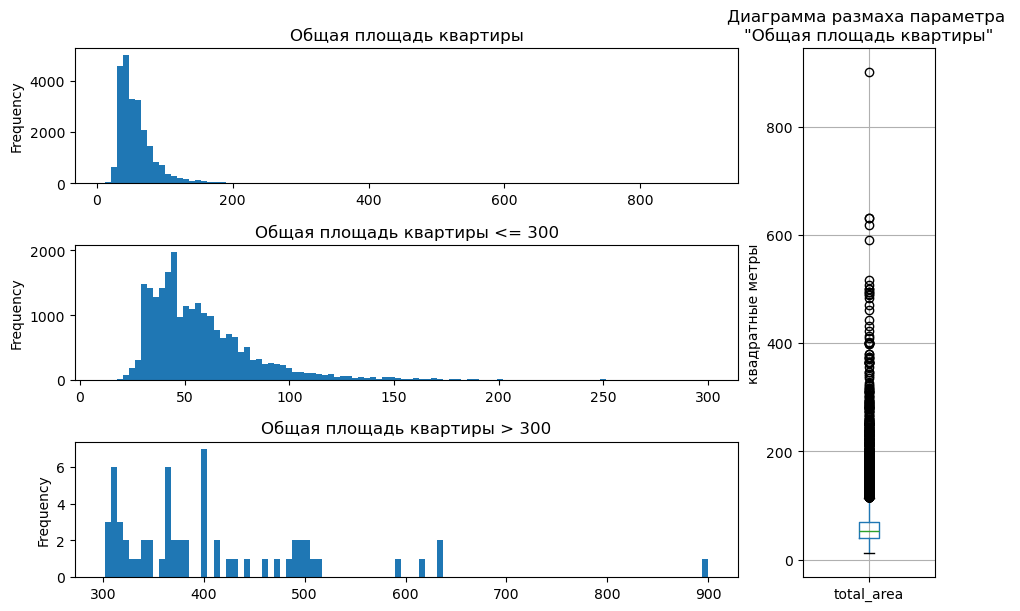

In [92]:
plot_grid('total_area', 0, 300, 'квадратные метры', bins=100)

In [93]:
stat_col('total_area')

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
mode        45.000000
Name: total_area, dtype: float64

Одномодальное распределение с явно выраженной правосторонней ассиметрией и довольно длинным правым хвостом. Значения, лежащие за верхним "усом" диаграммы размаха нельзя назвать выбросами, потому что они вписываются в общую частотную картину.

Большинство квартир меньше 53 кв. м., в среднем это 60 кв. м., наиболее часто встречаются квартиры с площадью 45 кв. м.

##### Жилая площадь (living_area)

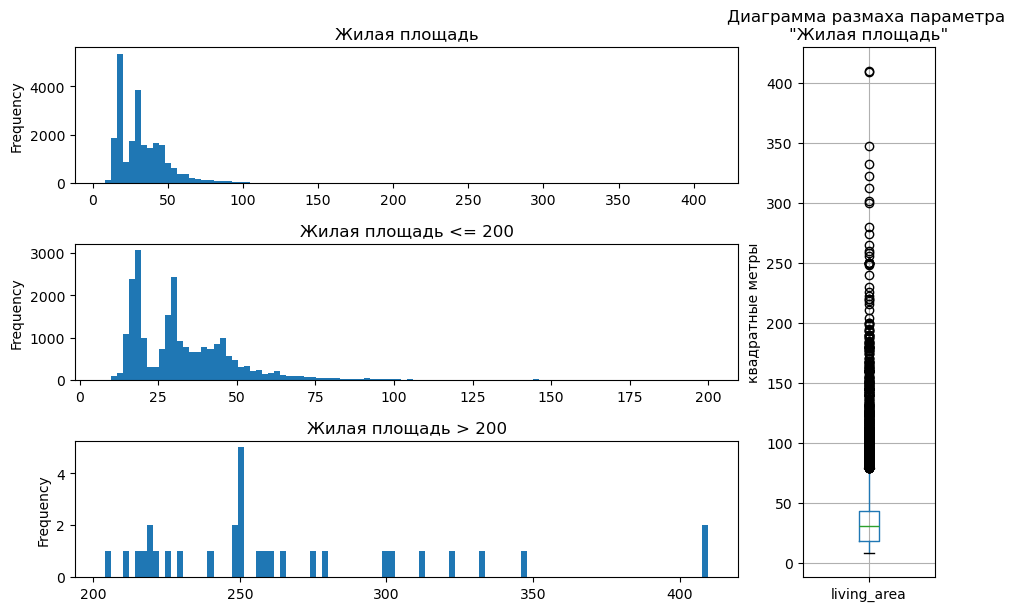

In [94]:
plot_grid('living_area', 0, 200, 'квадратные метры', bins=100)

In [95]:
stat_col('living_area')

count    23698.000000
mean        34.334406
std         21.691756
min          8.000000
25%         18.400000
50%         30.305000
75%         42.700000
max        409.700000
mode        18.000000
Name: living_area, dtype: float64

В целом статистические параметры этого признака аналогичны параметрам признака total_area, толко меньше, что объясняется тем, что жилая площадь часть общей площади.

В большинстве квартир жилая площадь меньше 31 кв. м., в среднем это 34 кв. м., чаще всего встречаются квартиры с жил. площадью 18 кв. м.

##### Площадь кухни (kitchen_area)

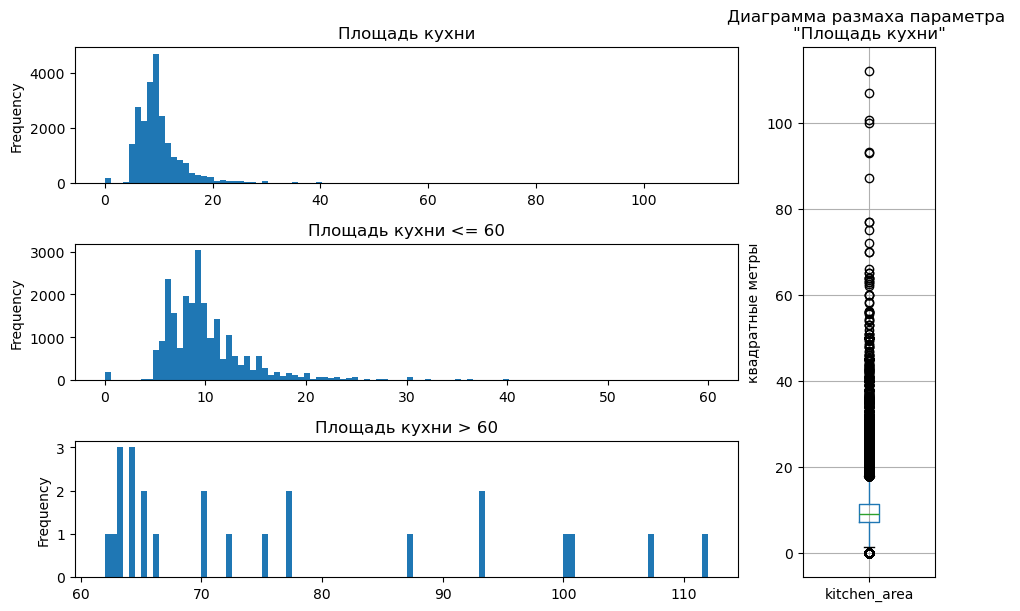

In [96]:
plot_grid('kitchen_area', 0, 60, 'квадратные метры', bins=100)

In [97]:
stat_col('kitchen_area')

count    23698.000000
mean        10.376243
std          5.716930
min          0.000000
25%          7.200000
50%          9.040000
75%         11.500000
max        112.000000
mode         6.000000
Name: kitchen_area, dtype: float64

Аналогично - статистические параметры этого признака похожи на параметры признаков total_area и living_area толко меньше, что объясняется тем, что площадь кухонь часть общей площади и как правило меньше жилой площади

В большинстве квартир площадь кухни меньше 10 кв. м., в среднем это 10 кв. м., чаще всего встречаются квартиры с кухней. площадью 6 кв. м.

##### Цена объекта (last_price)

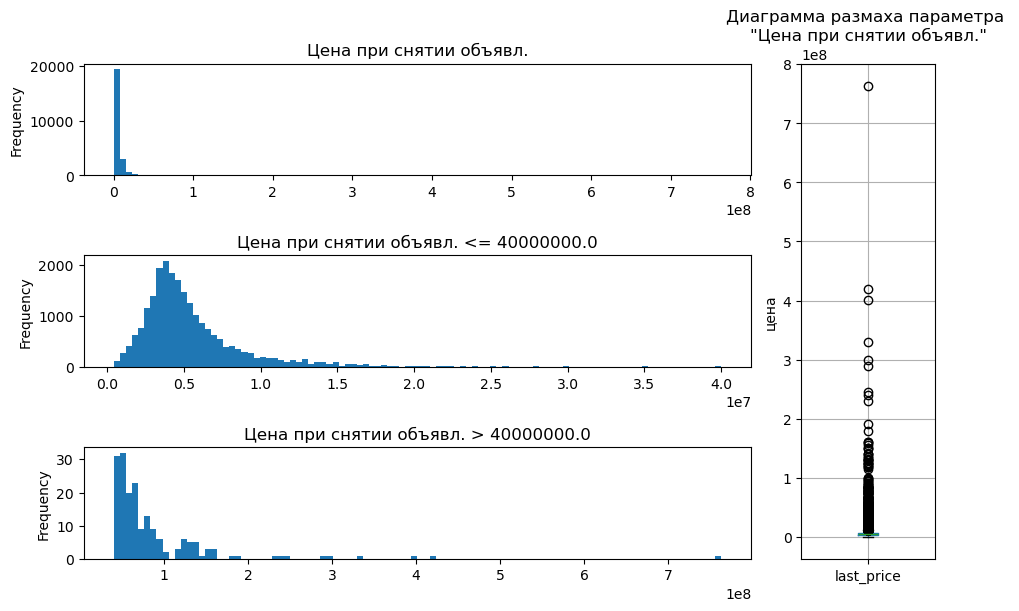

In [98]:
plot_grid('last_price', 0, 4e7, 'цена', bins=100)

In [99]:
stat_col('last_price')

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
mode     4.500000e+06
Name: last_price, dtype: float64

Такая же картина, как с площадью - одномодальное распределение с правосторонней ассиметрией и длинным хвостом, показывающая, что количество объявлений концентрируется вокруг моды и с ростом цены монотонно убывает.

Диаграмма разброса показывает такую же картину, как в случае с площадью помещений - большое количество значений, стоящих вне основной части выборки, но с убывающей частотой при увеличении цены. Это также не выбросы, а просто дорогая недвижимость, которой продается тем меньше, чем она дороже. Судя по графику, отдельного распределения такая дорогая недвижимость не формирует.

Большинство квартир стоит меньше 4,7 млн., в среднем - 6,5 млн, наиболее часто встрачаются объявления с ценой в 4,5 млн.

##### Количество комнат (rooms)

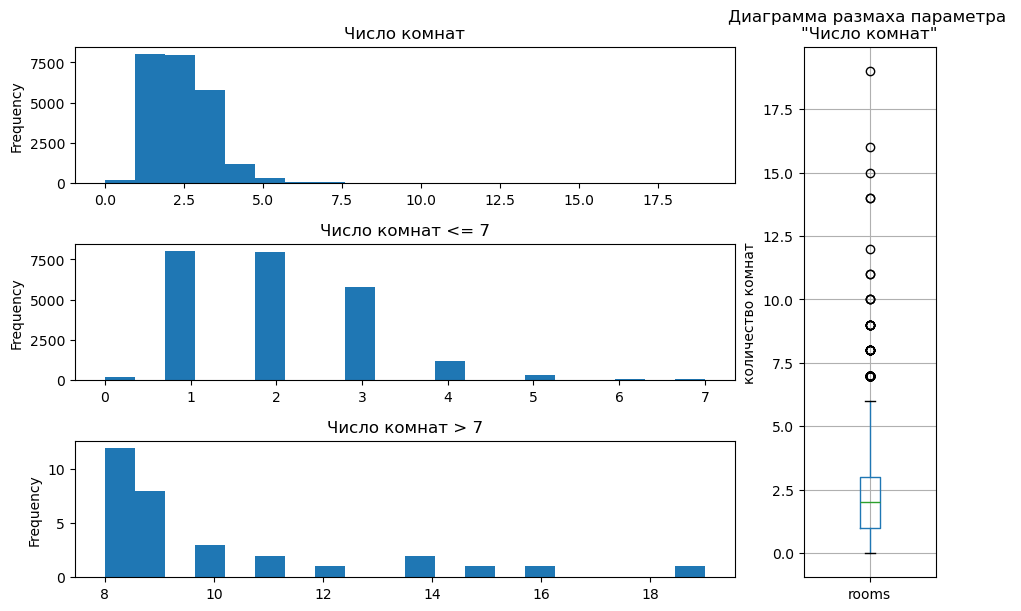

In [100]:
plot_grid('rooms', 0, 7, 'количество комнат', bins=20)

In [101]:
stat_col('rooms')

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
mode         1.000000
Name: rooms, dtype: float64

Картина аналогична распределения площади помещений.

В большинстве квартир 3 и меньше комнат, в среднем по 2,07 комнаты. Наиболее часто встречаются квартиры с 1 комнатой. Минимальное значение в 0 комнат связано с квартирами-студиями, где "нет" комнат (жилое помещение совмещены с кухней). 

##### Высота потолков (ceiling_height)

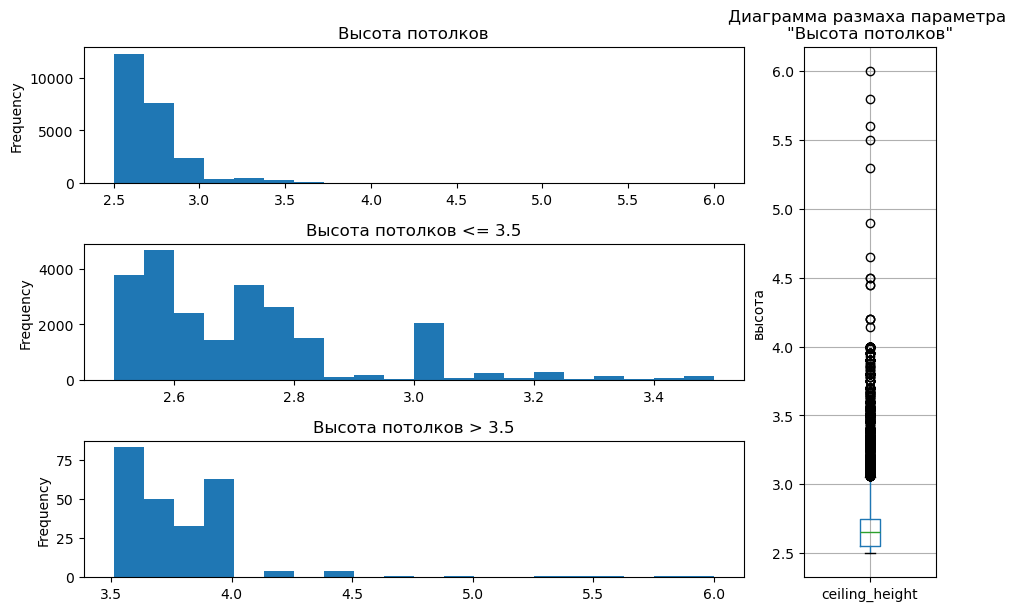

In [102]:
plot_grid('ceiling_height', 0, 3.5, 'высота', bins=20)

In [103]:
stat_col('ceiling_height')

count    23698.000000
mean         2.706296
std          0.225409
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
mode         2.550000
Name: ceiling_height, dtype: float64

Высота потолков также распределена правоассиметрично между значениями 2,5 и 6 м. Значения выше 4 в рамках предобработки данных были оставлены только за теми квартирами, которые находятся на последнем этаже и чья стоимость находится выше 75-го перцентиля, исходя из предположения о том, что это пентхаусы.
Наиболее часто в квартирах встречается высота в 2.55 метра.

##### Этаж квартиры (floor)

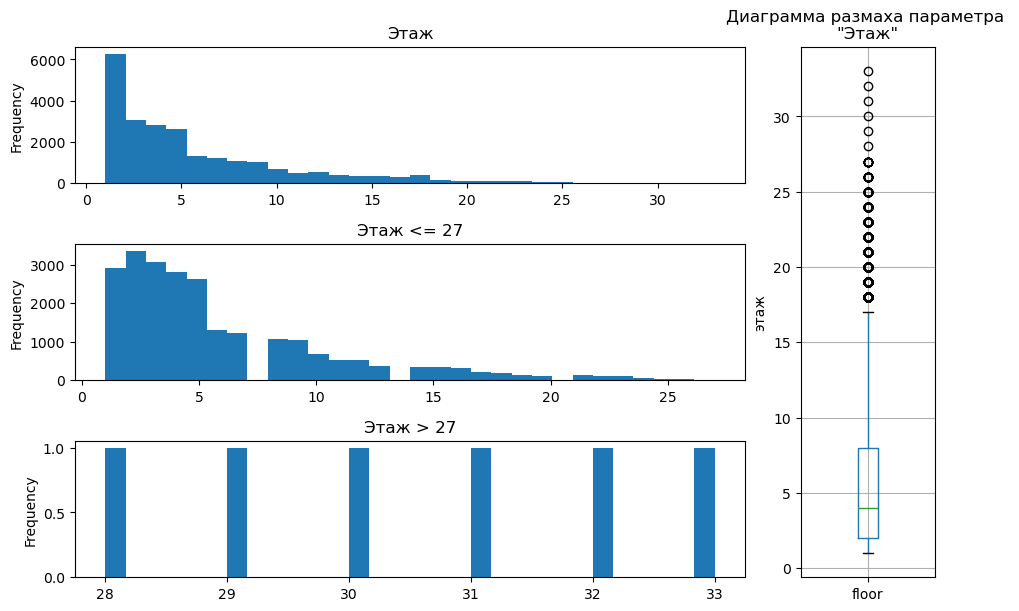

In [104]:
plot_grid('floor', 0, 27, 'этаж', bins=30)

In [105]:
stat_col('floor')

count    23698.000000
mean         5.891552
std          4.883775
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
mode         2.000000
Name: floor, dtype: float64

Одномодальное правоассиметричное распределение объявлений о продаже, между 1-м и 33-м этажом. Наиболее часто продают квартиры на 2-м этаже. 

##### Тип этажа квартиры («первый», «последний», «другой») (floor_type)

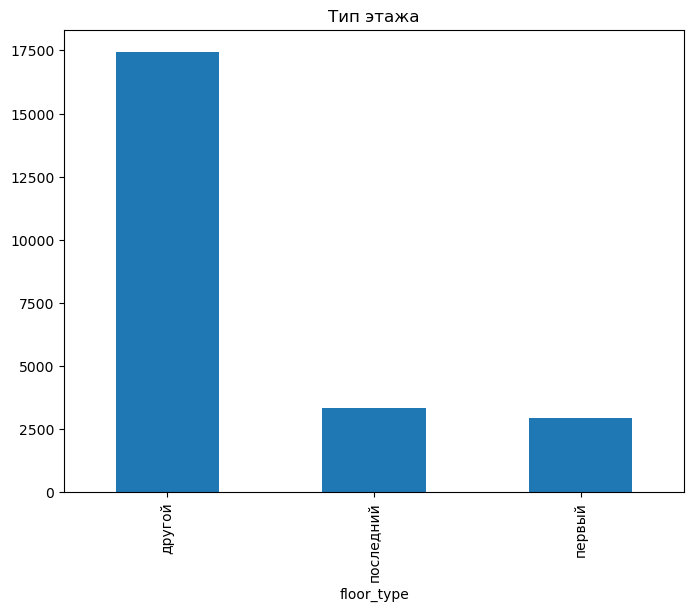

In [106]:
data['floor_type'].value_counts().plot(kind='bar', grid=False, figsize=(8, 6)).set_title('Тип этажа');

In [107]:
# распределение по количеству объявления
data['floor_type'].value_counts(normalize=True)

floor_type
другой       0.736180
последний    0.140729
первый       0.123091
Name: proportion, dtype: float64

Категориальный параметр, выделяющий первый и последний этажи, а также группу "другой" этаж. График распределения показывает, что объявлений на продажу квартир на последнем этаже чуть больше, чем на первом.

##### Общее количество этажей в доме (floors_total)

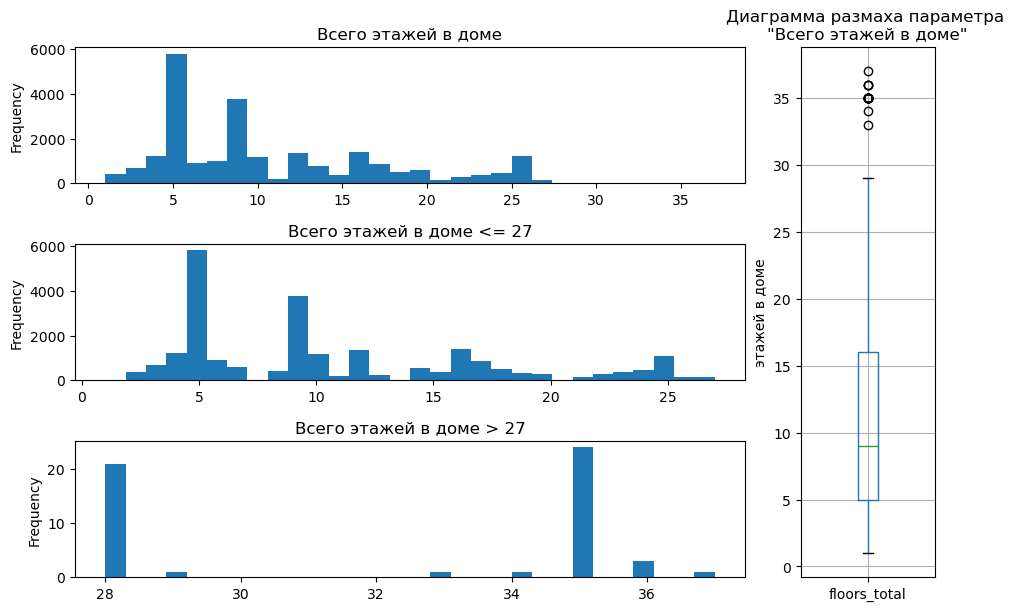

In [108]:
plot_grid('floors_total', 0, 27, 'этажей в доме', bins=30)

In [109]:
# распределение по количеству объявлений в домах определенной этажности

data.groupby('floors_total')['floors_total'].count()

floors_total
1       25
2      383
3      668
4     1200
5     5807
6      918
7      592
8      390
9     3770
10    1191
11     203
12    1362
13     229
14     553
15     365
16    1388
17     841
18     505
19     339
20     272
21     158
22     290
23     352
24     474
25    1083
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
37       1
Name: floors_total, dtype: int64

In [110]:
stat_col('floors_total')

count    23698.000000
mean        10.678327
std          6.586551
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
mode         5.000000
Name: floors_total, dtype: float64

Многомодальное правоассиметричное распределение, с пиками в районе 5, 9, 16 и 25, что отражает преобладающие типы этажности жилых квартирных домов. Наиболее часто встречаются объявления из пятиэтажек.

##### Расстояние до центра города в метрах (city_centers_nearest)

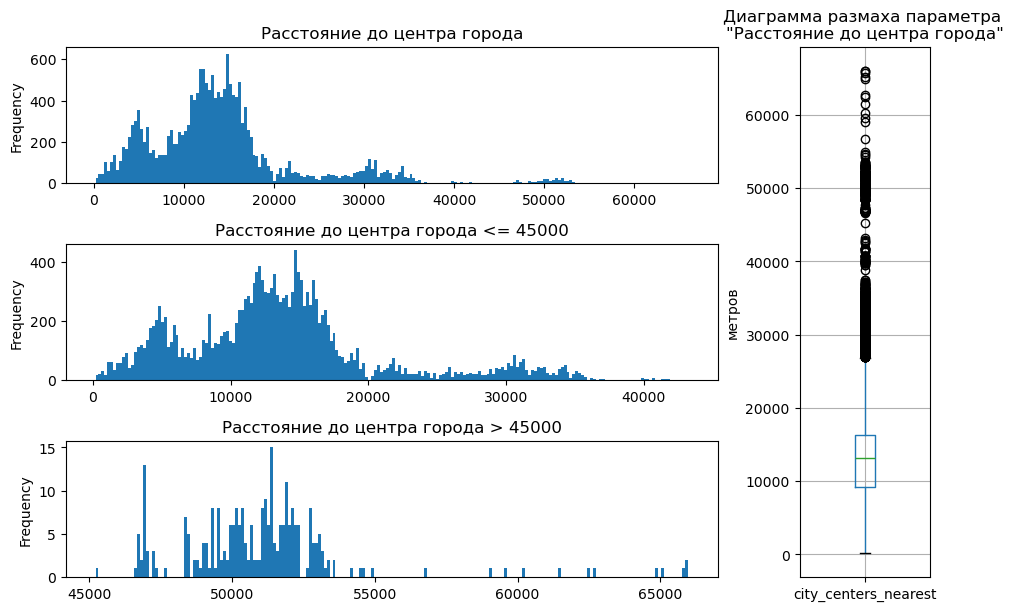

In [111]:
plot_grid('city_centers_nearest', 0, 45000, 'метров', bins=200)

In [112]:
stat_col('city_centers_nearest')

count    18179.000000
mean     14191.553716
std       8608.542615
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
mode      8460.000000
Name: city_centers_nearest, dtype: float64

Многомодальное правоассиметричное распределение с пиками около 5000, 12000, 15000, 31000 и 52000, что предположительно связано с нахождением на этих расстояниях от центра изменений в плотности застройки жилого фонда или же нахождение в этом радиусе каких-то других населенных пунктов.
Чаще всего в объвлениях встречается расстояние в 8460 метров до центра города. В среднем расстояние 14191 метра.

##### Расстояние до ближайшего аэропорта (airports_nearest)

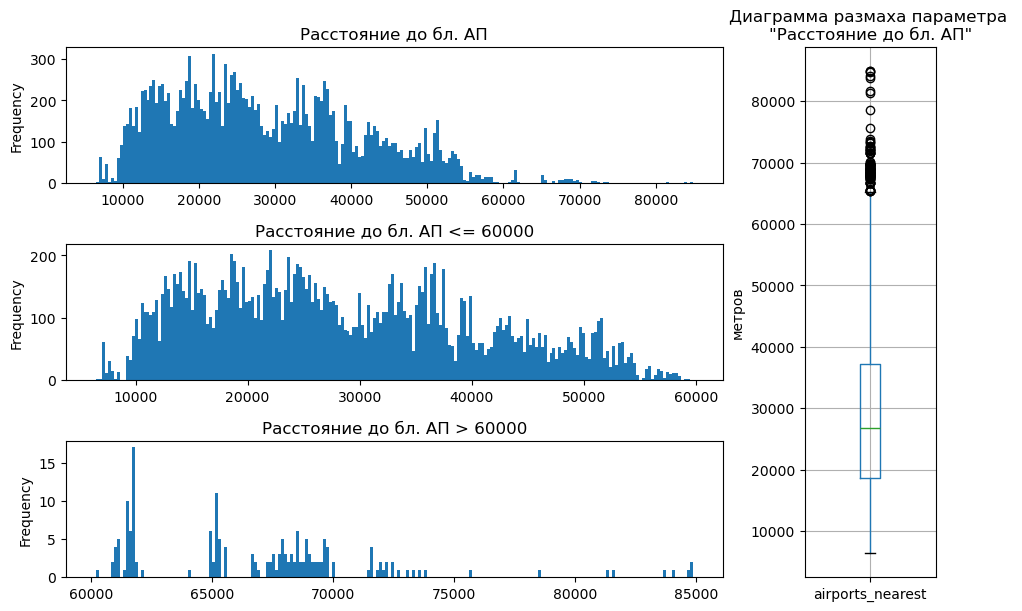

In [113]:
plot_grid('airports_nearest', 0, 60000, 'метров', bins=200)

In [114]:
stat_col('airports_nearest')

count    18156.000000
mean     28794.589833
std      12629.338041
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.500000
max      84869.000000
mode     37434.000000
Name: airports_nearest, dtype: float64

Многомодальное правоассиметричное распределение с пиками около 15000, 18000, 25000, 37000, 51000, 62000, 65000 и 68000 метров. Причины многомодальости скорее всего такие же - изменение в плотности застройки или разные населенные пункты на этом радиусе (что тоже своего рода изменения в плотности жилой застройки).

##### Расстояние до ближайшего парка (parks_nearest)

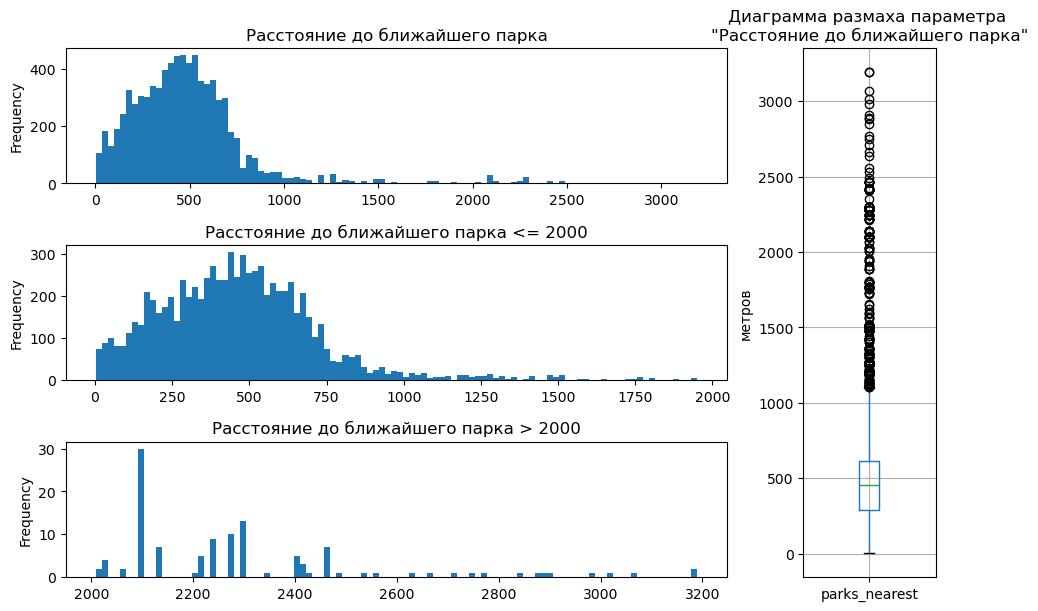

In [115]:
plot_grid('parks_nearest', 0, 2000, 'метров', bins=100)

In [116]:
stat_col('parks_nearest')

count    8078.000000
mean      490.826071
std       342.277947
min         3.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
mode      441.000000
Name: parks_nearest, dtype: float64

Одномодальное правоассиметричное распределение. Наиболее часто парк находится в 441 метре, в среднем - в 490 метрах.
Следует обратить внимание на значение count - всего 8078 строк, в которых присутствует расстояние до парка. Это всего треть от общего числа объявлений.

##### День публикации объявления (day_of_week)

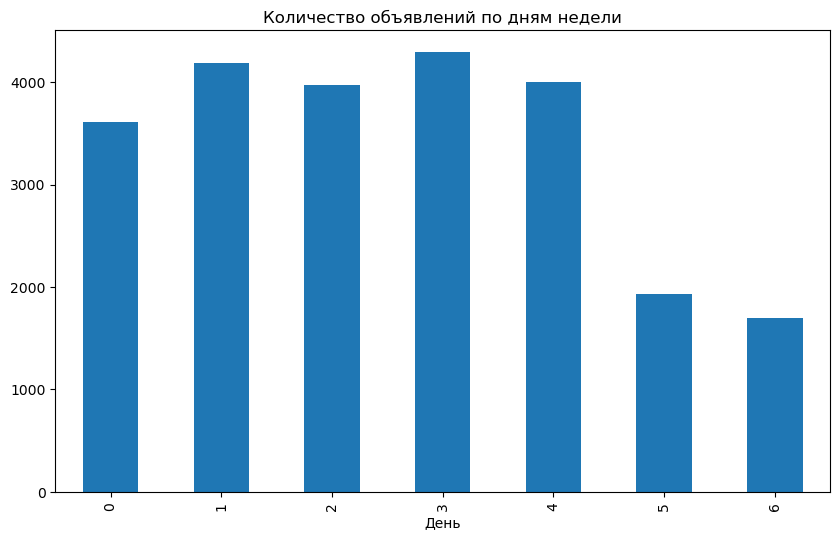

In [117]:
data.groupby('day_of_week')['day_of_week'].count().plot(
    kind='bar', grid=False, xlabel='День', title='Количество объявлений по дням недели', figsize=(10, 6)
);

In [118]:
stat_col('day_of_week')

count    23698.000000
mean         2.569331
std          1.789116
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
mode         3.000000
Name: day_of_week, dtype: float64

Чаще всего объявления публикуют в четверг, реже всего - в выходные. 

##### Месяц публикации объявления (month)

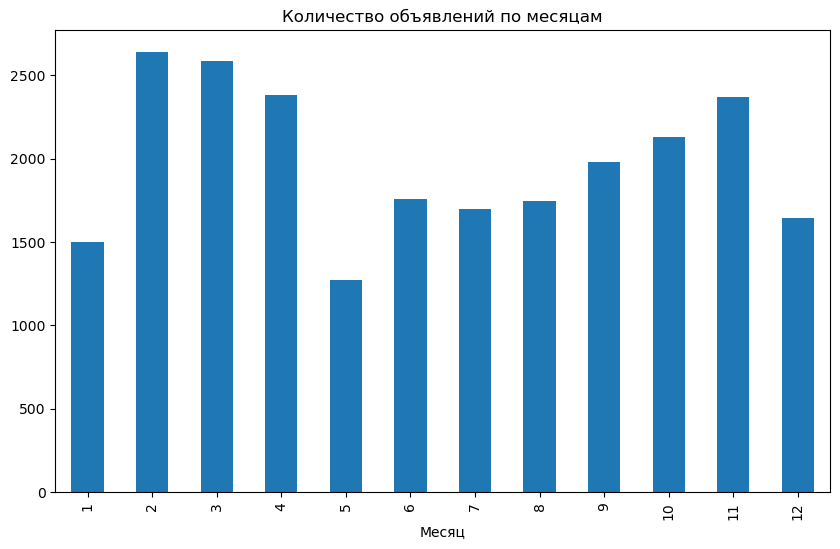

In [119]:
data.groupby('month')['month'].count().plot(
    kind='bar', grid=False, xlabel='Месяц', title='Количество объявлений по месяцам', figsize=(10, 6)
);

In [120]:
stat_col('month')

count    23698.000000
mean         6.400245
std          3.491565
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
mode         2.000000
Name: month, dtype: float64

Чаще всего объявления публикуют в феврале и марте, реже всего в январе и июне. 

### Изучить, как быстро продавались квартиры (по столбцу days_exposition)


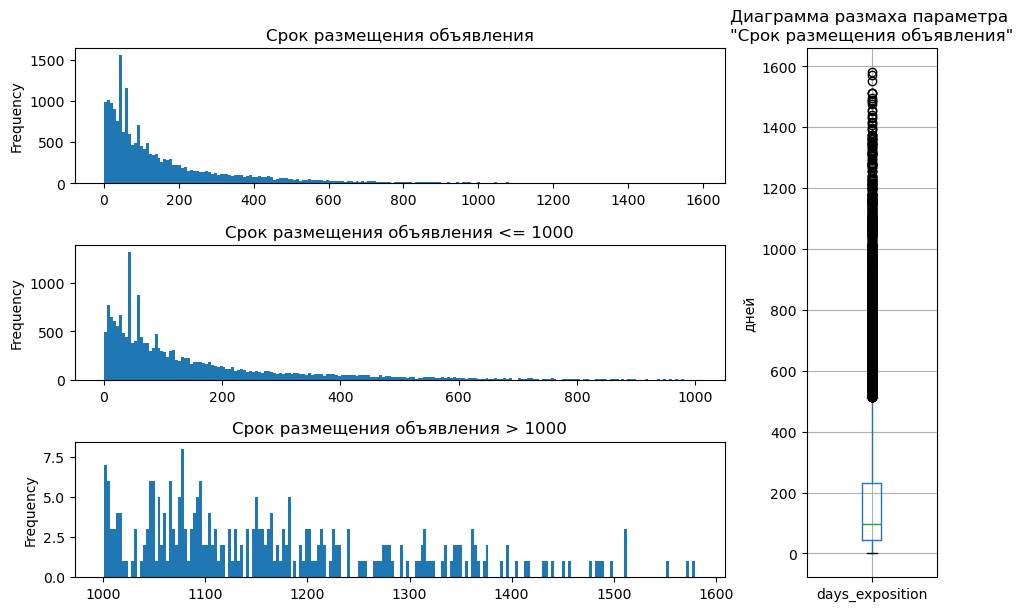

In [121]:
plot_grid('days_exposition', 0, 1000, 'дней', bins=200)

In [122]:
# среднее и медиана

data[data['days_exposition'] != -999]['days_exposition'].agg(['mean', 'median'])

mean      180.897061
median     95.000000
Name: days_exposition, dtype: float64

In [123]:
# пики продаж по дням (слева дни, справа количество продаж в этот день)

data[data['days_exposition'] != -999]['days_exposition'].value_counts()[:5]

days_exposition
45    880
60    538
7     234
30    208
90    204
Name: count, dtype: int64

In [124]:
# статистика по "сроку размещения"

stat_col('days_exposition')

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
mode        45.000000
Name: days_exposition, dtype: float64


Пики закрытия сделок наступают на 45 и 60 день публикации объявления, среднее время закрытия - 180 дней, медианное - 90 дней. Быстрыми продажами можно считать продажи быстрее медианного количества дней, то есть 95. Необычно долгими можно считать продажи, выходящие за верхний "ус" диаграмы разброса (232 + (232-45) * 1,5) = 512,5, то есть занимающие более 513 полных дней. 

In [125]:
# отличия "быстрых" и "медленных" продаж

fast_sales = data[(data['days_exposition'] != -999) & (data['days_exposition'] < 95)]
slow_sales = data[(data['days_exposition'] != -999) & (data['days_exposition'] > 513)]

In [126]:
fast_sales[['last_price', 'total_area', 'rooms', 'city_centers_kms']].mean()

last_price          5.576426e+06
total_area          5.468783e+01
rooms               1.904715e+00
city_centers_kms    1.097020e+01
dtype: float64

In [127]:
slow_sales[['last_price', 'total_area', 'rooms', 'city_centers_kms']].mean()

last_price          8.237838e+06
total_area          7.034605e+01
rooms               2.321321e+00
city_centers_kms    9.840240e+00
dtype: float64

##### Выводы по задаче изучения скорости продажи квартиры
По статистическим данным видно, что медленнее продается более дорогая в среднем недвижимость, с большей средней площадью, с большим средним количеством комнат и ближе к центру города.

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта
  Признаки общей площади, жилой площади, площади кухни, количество комнат являются количественными.
  
  Типы этажа (первый, последний, другой) и дата размещения (день недели, месяц, год) - категориальными.
  
  Для количественных считаю корреляцию, по категориальным - визуализирую среднее значение по каждой категории для каждого признака:

##### Факторы количественных признаков:

In [128]:
# численное представление линейной взаимосвязи (корреляции) между количественными признаками

data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653740,0.556440,0.451812,0.363344
total_area,0.653740,1.000000,0.909979,0.588950,0.758377
living_area,0.556440,0.909979,1.000000,0.427363,0.853627
kitchen_area,0.451812,0.588950,0.427363,1.000000,0.295407
rooms,0.363344,0.758377,0.853627,0.295407,1.000000


Из количесвтенных факторов наибольшую корреляцию с ценой показывает общая площадь помещения, наименьшую корреляцию - количество комнат. Лучше всего это видно на тепловой карте:

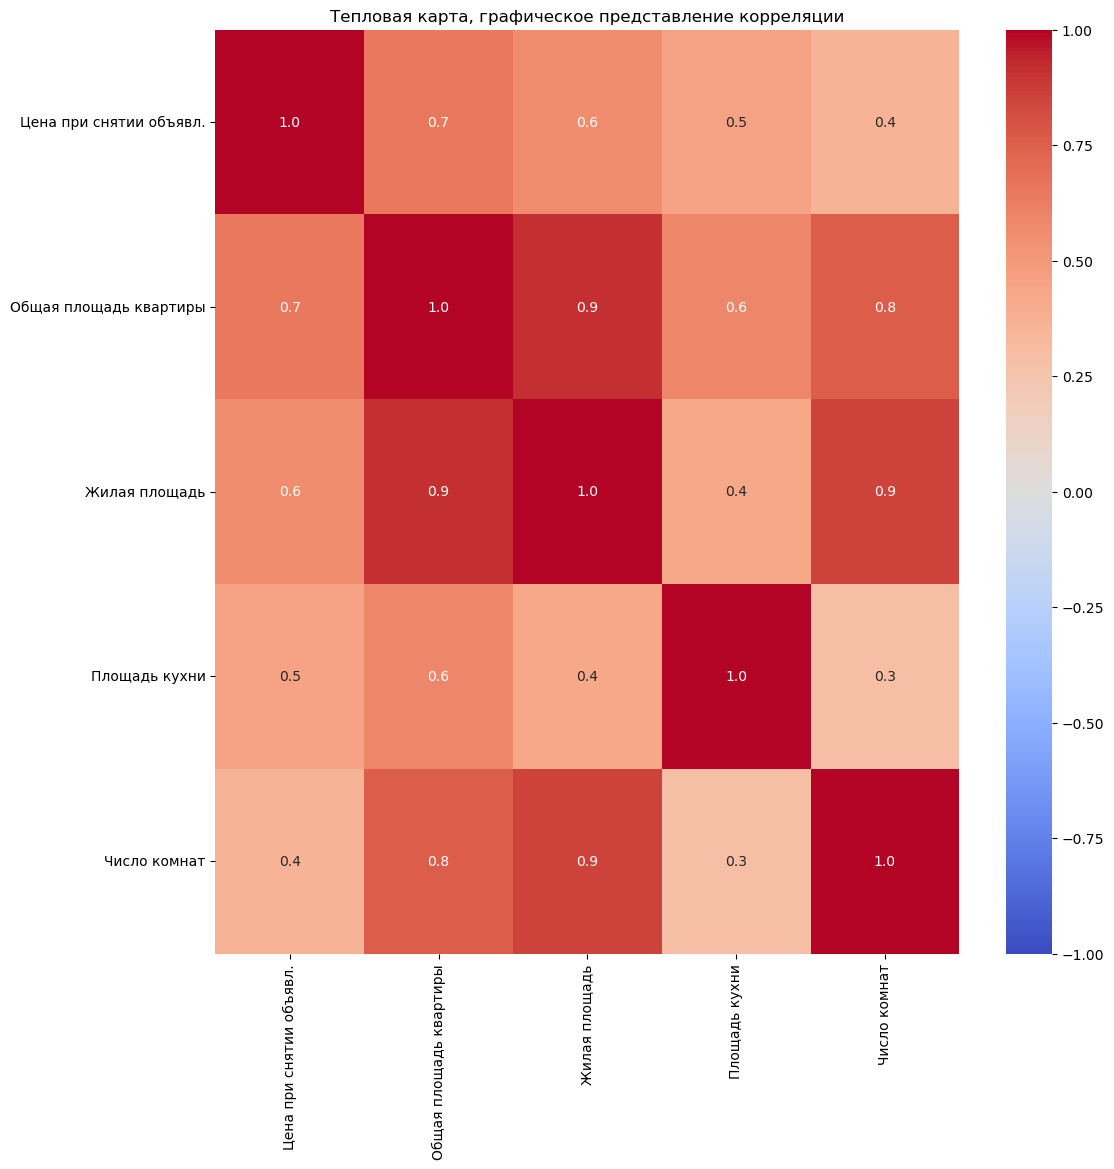

In [129]:
# тепловая карта, графическое представление корреляции 

num_data = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
corr = num_data.corr()
plt.figure(figsize=(12, 12))

sns.heatmap(corr,
    yticklabels = [ru_name[i] for i in corr],
    xticklabels = [ru_name[i] for i in corr],
    cmap='coolwarm',
    vmin=-1.0, vmax=1.0,
    annot=True, fmt='0,.1f'
    ).set_title('Тепловая карта, графическое представление корреляции');

Характер зависимости лучше всего видно на точечном графике:

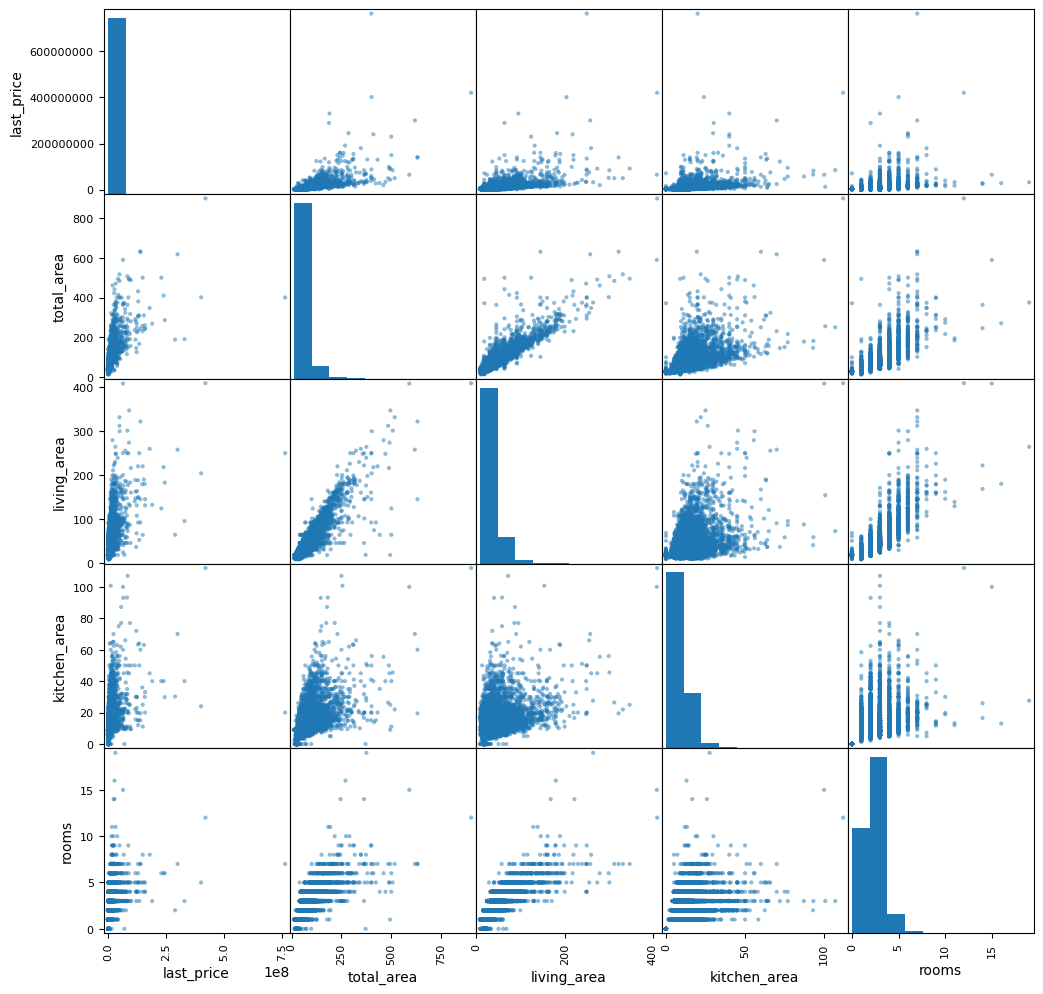

In [130]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area',
             'rooms']], figsize=(12, 12));

Видно, что цена положительно линейно связана практически со всеми выбранными количественными параметрами с явно выраженной гетероскедастичностью (разной дисперсией), выраженной в росте разброса с ростом значений параметра. 

##### Факторы категориальных признаков:

In [131]:
# статистика цен по типам этажей

fl_type_gr = data.groupby('floor_type')['last_price']
fl_type_gr.describe().astype('int64')

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
другой,17446,6675444,8611335,450000,3600000,4850000,7000000,330000000
первый,2917,4803560,5098889,430000,2800000,3900000,5400000,135000000
последний,3335,7363228,20695671,430000,3000000,4300000,6700000,763000000


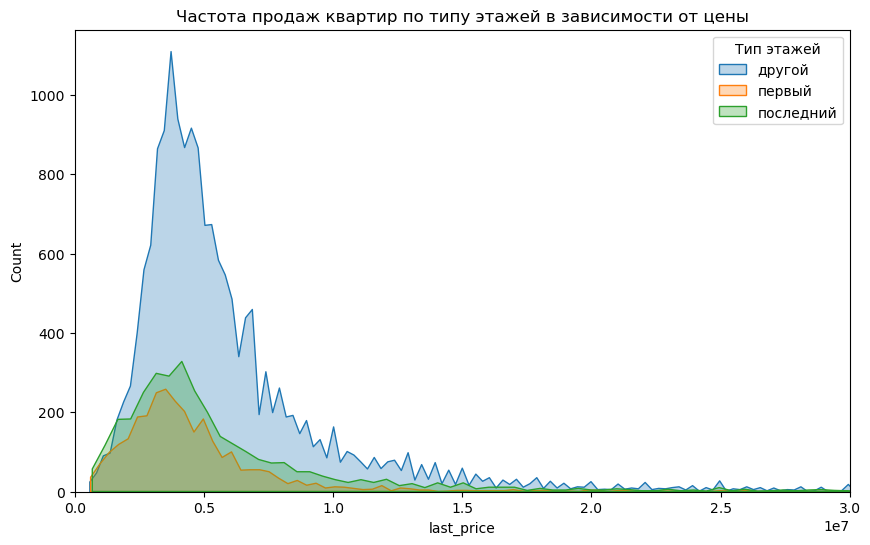

In [132]:
# частота до цены 3*10^7

plt.figure(figsize=(10, 6))
fl_groups = fl_type_gr.groups.keys()
for g in fl_groups:
    sns.histplot(fl_type_gr.get_group(g), fill=True, alpha=0.3, element='poly', label=g
                ).set_title('Частота продаж квартир по типу этажей в зависимости от цены')
plt.legend(title='Тип этажей')
plt.xlim(0, 3e7);

(0.0, 40.0)

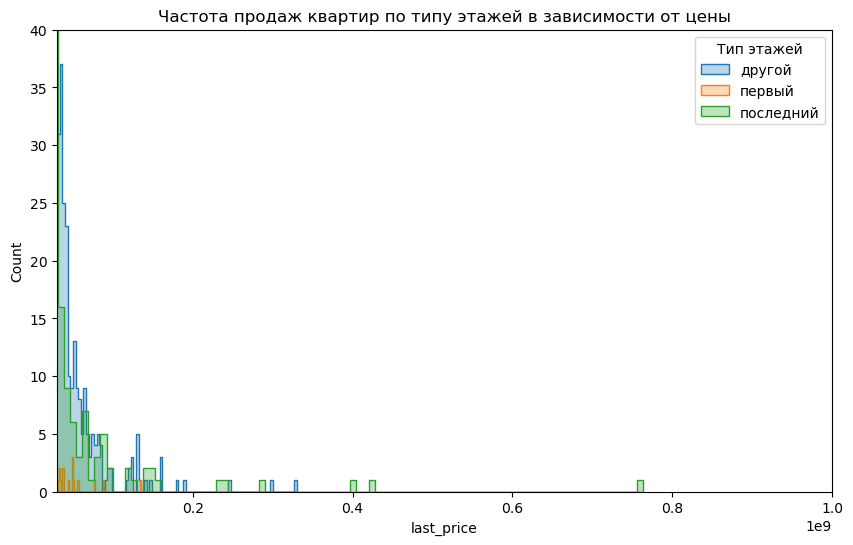

In [133]:
# частота после цены 3*10^7

plt.figure(figsize=(10, 6))
fl_groups = fl_type_gr.groups.keys()
for g in fl_groups:
    sns.histplot(fl_type_gr.get_group(g), fill=True, alpha=0.3, element='step', label=g, bins=100
                ).set_title('Частота продаж квартир по типу этажей в зависимости от цены')
plt.legend(title='Тип этажей')
plt.xlim(3e7, 1e9); plt.ylim(0, 40)

По численным данным видно, что квартиры на первом этаже в среднем дешевле всего, когда речь идет о всех значениях цены, вплоть до 75-го перцентиля. Квартиры на последнем несколько дороже, но также дешевле квартир между первым и последним вплоть до 75-го перцентиля, однако в среднем квартиры на последнем этаже самые дорогие.
На графике можно увидеть, что для экстремально дорогой недвижимости (стоимостью выше 100 000 000) характерен именно последний этаж, именно его видно чаще остальных, что существенно сдвигает среднюю стоимость квартир на последнем этаже вверх. Это можно объяснить тем, что это квартиры-пентхаусы.

In [134]:
# распределение цены по дням недели

data.pivot_table(index='day_of_week', values='last_price', aggfunc='describe').astype('int64')

,25%,50%,75%,count,max,mean,min,std
day_of_week,,,,,,,,
0,3450000,4650000,6700000,3612,300000000,6511613,430000,9631997
1,3440000,4730000,6800000,4183,289238400,6394233,430000,8602253
2,3429000,4700000,6900000,3973,420000000,6629635,450000,11784002
3,3450000,4650000,6985000,4295,159984000,6708663,450000,8469948
4,3440000,4585000,6700000,4000,190870000,6372130,450000,8536777
5,3372500,4555000,6600000,1936,763000000,6976803,550000,21645150
6,3400000,4550000,6500000,1699,130000000,6246180,470000,7895173


In [135]:
# функция для отрисовки гистограмм зависимости цен от категориальных признаков

def plot_bars(column):
    '''Plots twoo histograms of a "data" dataframe column
    First histogram shows frequency, second - mean price'''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    data.groupby(column)['last_price'].count().plot(
        kind='bar', grid=False, ax=axes[0],
        title='Распределение частоты объявлений \n',
        ylabel='Частота',
        xlabel=ru_name[column]
    );
    
    data.groupby(column)['last_price'].mean().plot(
        kind='bar', legend=True, grid=False, ax=axes[1],
        title='Распределение средней цены объявлений \n',
        ylabel='Средняя цена',
        xlabel=ru_name[column]
    );

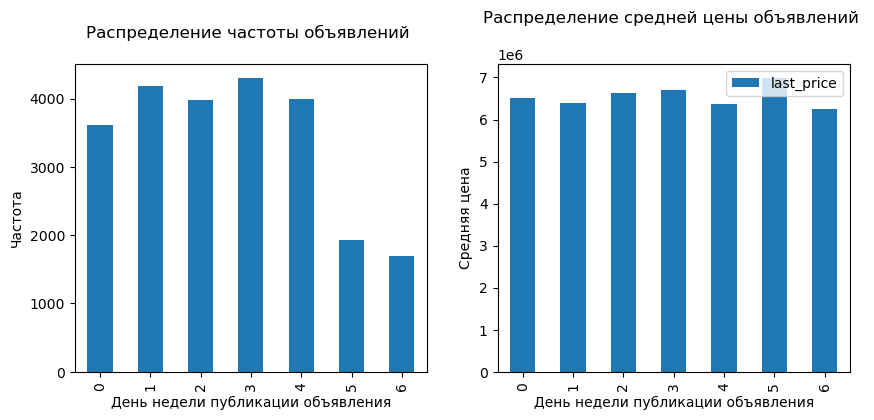

In [136]:
plot_bars('day_of_week')

Видно, что средняя цена практически не зависит как от дня недели, в который размещено объявления, так и от их общего количества, приходящихся на этот день недели. 

In [137]:
# распределение цены по месяцам

data.pivot_table(index='month', values='last_price', aggfunc='describe').astype('int64')

,25%,50%,75%,count,max,mean,min,std
month,,,,,,,,
1,3397500,4600000,6850000,1500,180000000,6668233,480000,9336479
2,3380000,4650000,6750000,2640,401300000,6468500,450000,10349868
3,3400000,4650000,6600000,2586,289238400,6361729,550000,9579975
4,3500000,4800000,6855000,2379,330000000,6737198,430000,12540150
5,3442500,4515000,6800000,1274,230000000,6600435,490000,10024161
6,3300000,4400000,6512500,1760,124480000,6310269,430000,8081049
7,3450000,4650000,6900000,1695,140000000,6649337,440000,9091882
8,3400000,4570000,6700000,1744,159984000,6350232,450000,7932711
9,3470000,4700000,6990000,1981,763000000,6825470,520000,18452473


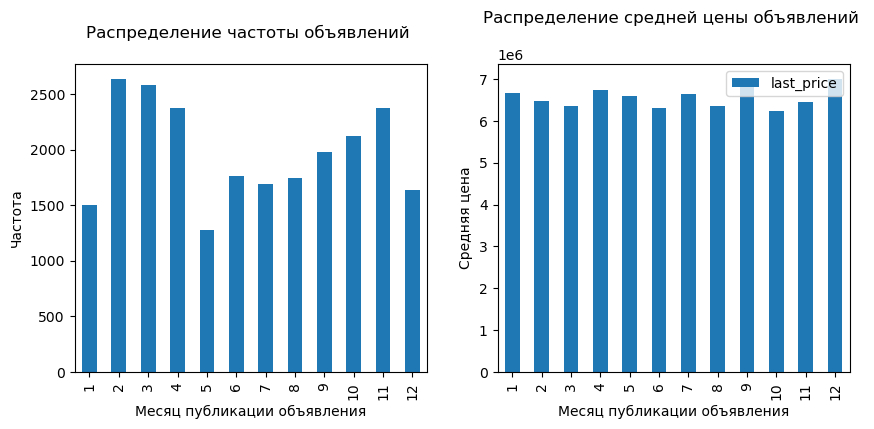

In [138]:
plot_bars('month')

Видно, что не смотря на выраженную сезонность в частоте объявлений, средняя цена не зависит от месяца публикации объявления.

In [139]:
# распределение цены по годам

data.pivot_table(index='year', values='last_price', aggfunc='describe').astype('int64')

,25%,50%,75%,count,max,mean,min,std
year,,,,,,,,
2014,4421650,7700000,14500000,137,79339000,12087135,1200000,12519683
2015,3750000,5350000,8270000,1191,180000000,8572833,650000,13302083
2016,3400000,4550000,6800000,2783,401300000,6827912,490000,12047288
2017,3350000,4500000,6700000,8190,763000000,6585729,450000,13416820
2018,3350000,4550000,6500000,8519,330000000,5950966,430000,7167627
2019,3700000,5050000,7200000,2878,289238400,6784740,430000,9301702


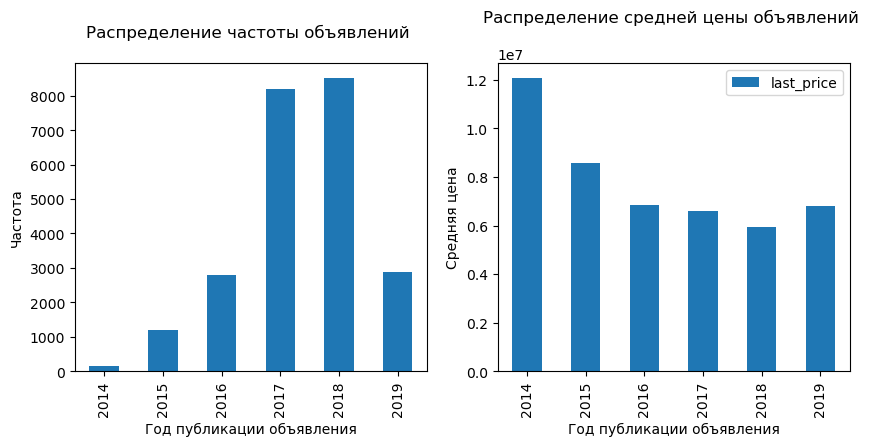

In [140]:
plot_bars('year')

По графику заметно, что количество публикаций объявлений растет от года к году, однако в 2019-м году наблюдается провал. Но это ложный вывод, так как по 2019-му году у нас просто недостает данных:

In [141]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

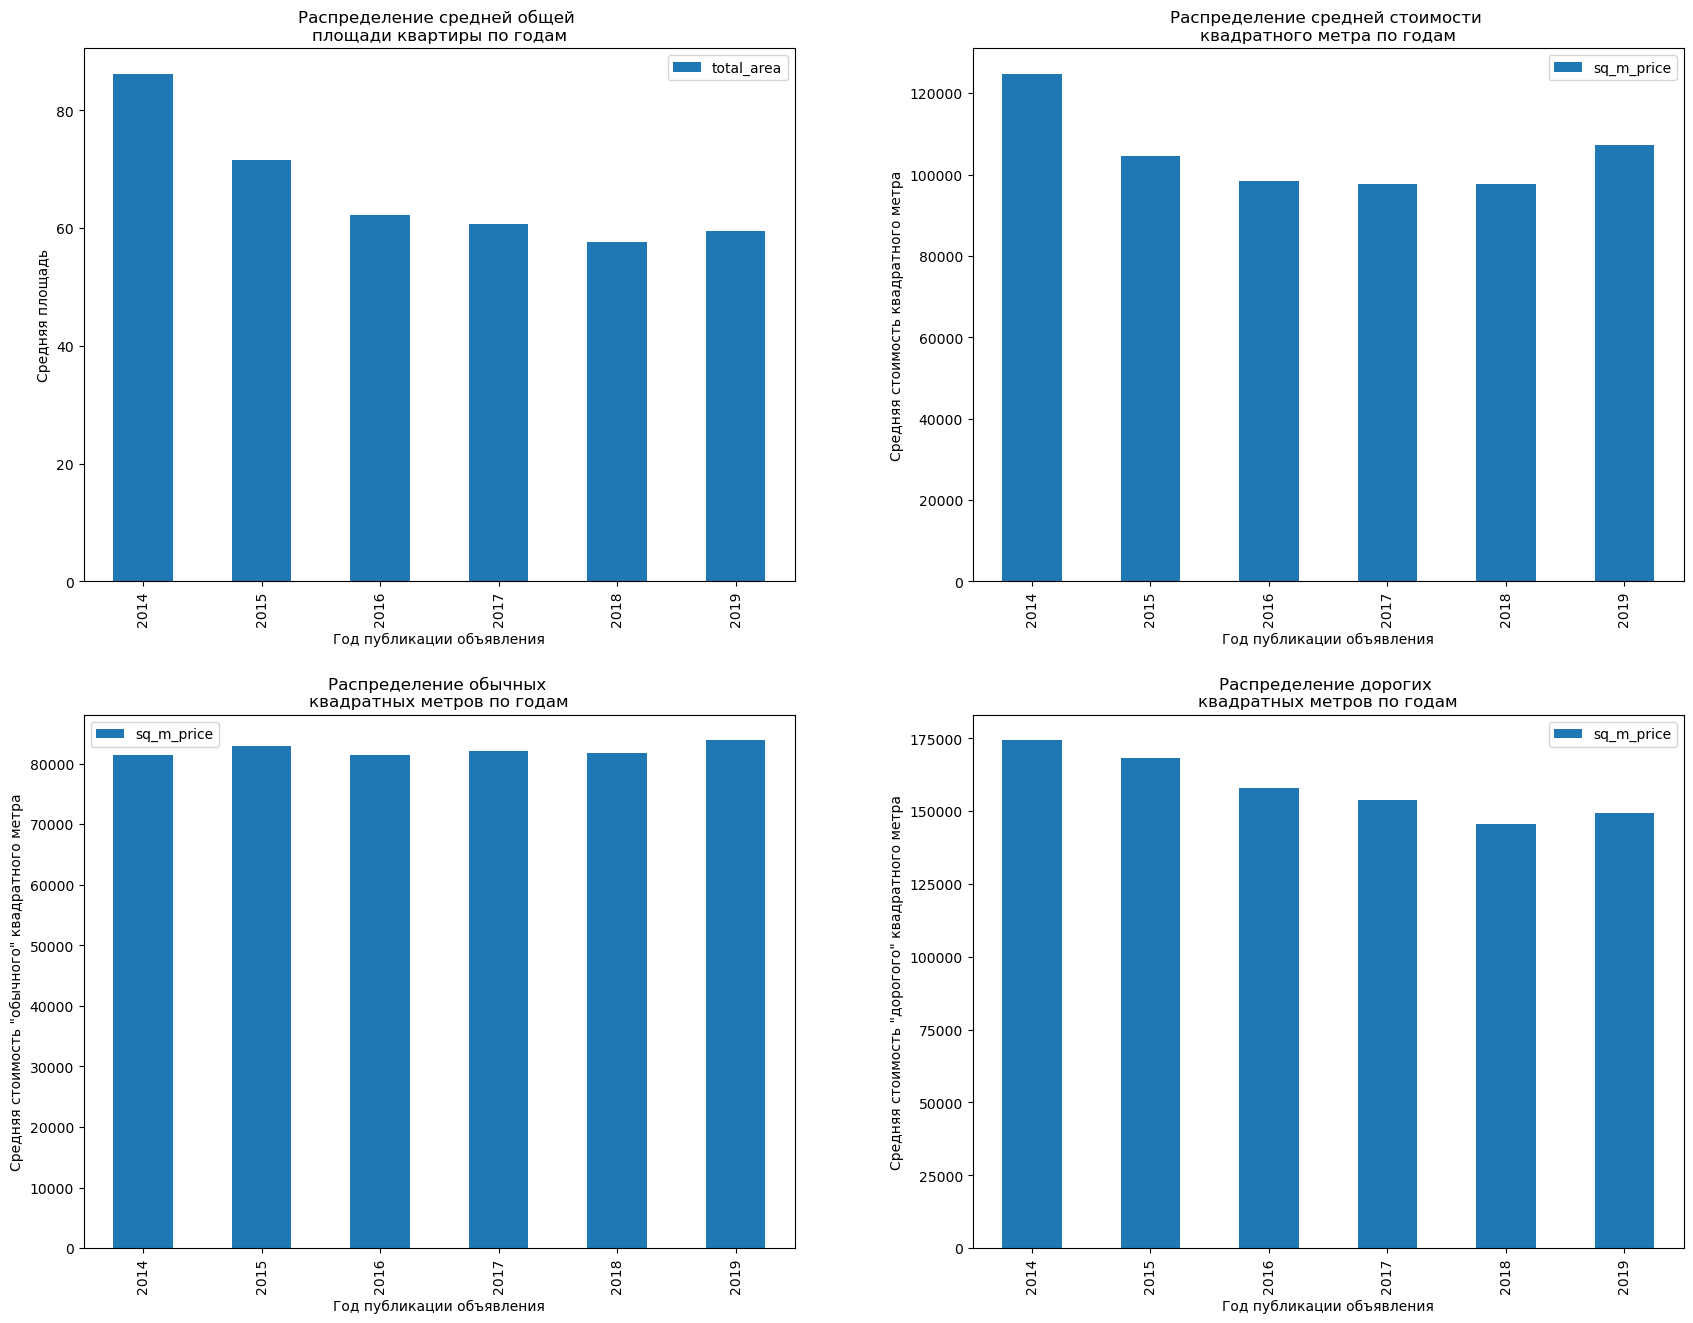

In [142]:
# графики распределений средних значений "общей площади", "стоимости квадратного метра",
# "стоимости обычного квадратного метра" (по ценам ниже 75-го перцентиля) и "стоимости дорогого квадратного метра"

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

data.groupby('year')['total_area'].mean().plot(
        kind='bar', legend=True, grid=False,
        title='Распределение средней общей \nплощади квартиры по годам',
        ylabel='Средняя площадь',
        xlabel=ru_name['year'],
        ax=axes[0, 0]
    );

data.groupby('year')['sq_m_price'].mean().plot(
        kind='bar', legend=True, grid=False,
        title='Распределение средней стоимости \nквадратного метра по годам',
        ylabel='Средняя стоимость квадратного метра',
        xlabel=ru_name['year'],
        ax=axes[0, 1]
    );

data[data['sq_m_price'] < data['sq_m_price'].quantile(0.75)].groupby('year')['sq_m_price'].mean().plot(
        kind='bar', legend=True, grid=False,
        title='\n\nРаспределение обычных \nквадратных метров по годам',
        ylabel='Средняя стоимость "обычного" квадратного метра',
        xlabel=ru_name['year'],
        ax=axes[1, 0]
    );

data[data['sq_m_price'] >= data['sq_m_price'].quantile(0.75)].groupby('year')['sq_m_price'].mean().plot(
        kind='bar', legend=True, grid=False,
        title='\n\nРаспределение дорогих \nквадратных метров по годам',
        ylabel='Средняя стоимость "дорогого" квадратного метра',
        xlabel=ru_name['year'],
        ax=axes[1, 1]
    );
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)

На графике распределения средних цен по годам мы наблюдаем падение средней цены объявления вплоть до 2018 года, после чего начался рост. Так как сезонности в данных по параметру средней цены для дней и месяцев не обнаружено, рост цены в 2019-м году нельзя объяснить недостатком в данных.

На графиках распределения средней общей площади и средней стоимости квадратного метра по годам можно также увидеть снижение от года к году вплоть до 2019-го, что отчасти объясняет падение средней цены объявления за эти годы.

Дальнейшая детализация по стоимости квадратного метра площади показывает, что в период с 2014-го по 2018-й цены падали только на "дорогую" недвижимость.

##### Вывод по задаче "Факторы, которые больше всего влияют на общую (полную) стоимость объекта" :
Из количественных признаков все положительно скоррелированы с ценой, сильнее всего общая площадь - на 0,65; слабее всего количество комнат - на 0,36.

Категориальные:
Тип этажа влияет на цену следующим образом: первые этажи как правило в среднем самые дешевые (4,8 млн), затем идут последние этажи (6,7 млн), и самые дорогие в среднем последние этажи (7,4 млн). Последнее вызвано тем, что в доле квартир на последнем этаже присутствует экстремально дорогая недвижимость (предположительно пентхаусы). Без их учета квартиры на последних этажах в среднем дешевле квартир на других этажах, но дороже кварит на первом.

Средняя цена не связана с днем и месяцем публикации объявления (колеблется от 6,3 до 7 млн), однако связана с годом (снижается с 12 млн в 2014 до 5,9 млн в 2018, затем растет до 6,8 млн в 2019). 

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
 

In [143]:
# названия 10 населенных пунктов с наибольшим количеством объявлений

top_ten = data['locality_name'].value_counts()[:10]
top_ten

locality_name
Санкт-Петербург    15720
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: count, dtype: int64

In [144]:
filtered_data = data[data['locality_name'].isin(top_ten.index)]
mean_sqmp = filtered_data.groupby('locality_name')['sq_m_price'].mean().sort_values()

print(mean_sqmp)
print()
print(f'Самый дешевый квадратный метр в нас. пун. {mean_sqmp.index[0]}: {mean_sqmp.iloc[0]:.2f}')
print(f'Самый дорогой квадратный метр в нас. пун. {mean_sqmp.index[-1]}: {mean_sqmp.iloc[-1]:.2f}')

locality_name
Выборг              58141.909153
Всеволожск          68654.473986
Гатчина             68746.146763
Колпино             75424.579098
Шушары              78677.364217
Мурино              86087.512050
Парголово           90175.913458
Кудрово             95324.930544
Пушкин             103125.819291
Санкт-Петербург    114856.307596
Name: sq_m_price, dtype: float64

Самый дешевый квадратный метр в нас. пун. Выборг: 58141.91
Самый дорогой квадратный метр в нас. пун. Санкт-Петербург: 114856.31


##### Вывод по "средней цене одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений"
В среднем, среди первой десятки по количеству объявлений самый дешевый квадратный метр в г. Выборг (58 тыс. 142), а самый дорогой квадратный метр в Санкт-Петербурге (114 тыс. 849).

### Выделение квартир в Санкт-Петербурге (с помощью столбца locality_name) и вычисление средней цены каждого километра до центра


Группирую квартиры в СПБ по расстоянию до центра (в км), после чего считаю среднюю цену квартир в каждом радиусе:

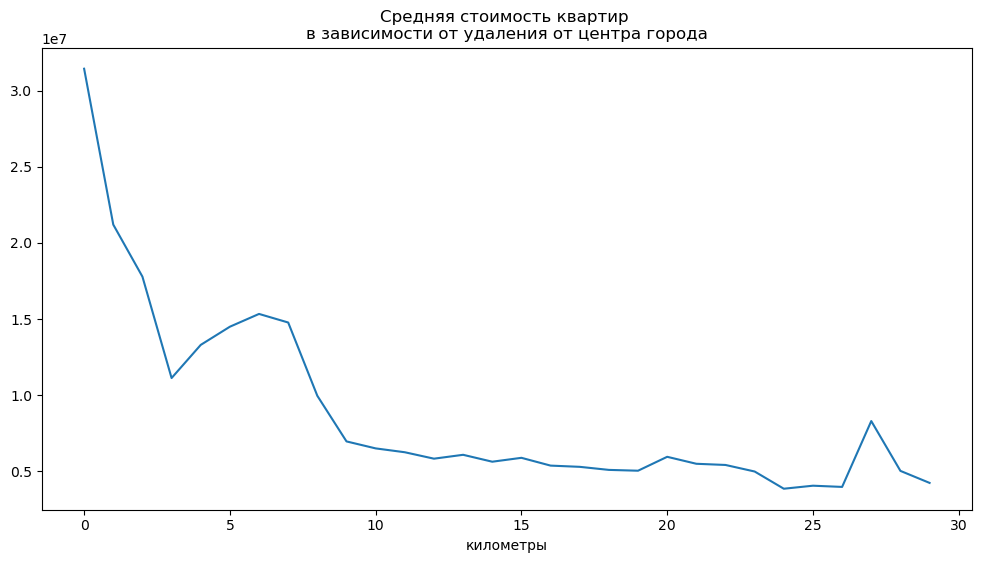

In [145]:
# пропуски в city_centers_nearest заполнянлись значением -999
# при делении на 1000 и приведении в int получилось -1
# второе условие исключает -1 

mean_km_price = data[
                    (data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_kms'] != -1)
                    ].groupby('city_centers_kms')['last_price'].mean() # средняя цена недвижимости внутри радиуса
plt.figure(figsize=(12,6))
mean_km_price.plot(kind='line',
                   title='Cредняя стоимость квартир \nв зависимости от удаления от центра города').set_xlabel('километры');

In [146]:
# средняя цена удаления от центра на километр

round(mean_km_price.diff().mean(), 2)

-938360.32

##### Вывод по выделению квартир в СПБ и вычислению средней цены каждого километра до центра
Средняя цена квартиры находится в обратной зависимости от расстояния до центра города. Судя по графику, цена снижается экспоненциально.

В среднем, каждый километр от центра делает жилье дешевле на 938360.32

### Выводы, исследовательский анализ данных

- В ходе исследовательского анализа данных были изучены параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка,    день, месяц публикации объявления и срок размещения объявления. Для данных параметров были определены формы распределения, диапазоны значений и типичные статистические показатели. Для демонстрации распределения были построены гистограммы, графики разбросов и столбчатые графики.
 - Все количественные параметры имеют ярковыраженное правоассимитричное распределение, большинство из них одномодальны (с одним ярко выраженным локальным максимумом), за исключением многомодальных распределений общего количества этажей, расстояния до центра города и расстояния до ближайшего аэропорта. Многомодальность параметров, характеризующих расстояния, скорее всего связана с изменениями плотности застройки (либо внутри города, либо это другие города на этом же радиусе). Многомодальность количества этажей в зданиях связана с типовыми застройками. Например, в СССР было построено много пяти- и девятиеэтажек.

 - По статистическим данным видно, что медленнее продается более дорогая в среднем недвижимость, с большей средней площадью, с большим средним количеством комнат и ближе к центру города.

 - Факторы, которые больше всего влияют на общую стоимость: 
      - Такие количественные признаки, как общая площадь (<code>total_area</code>), жилая площадь (<code>living_area</code>), площадь кухни (<code>kitchen_area</code>), количество комнат (<code>rooms</code>) все положительно скоррелированы с общей стоимостью (<code>last_price</code>). Сильнее всего общая площадь - на 0,65; слабее всего количество комнат - на 0,36. У линейной связи между стоимостью и этими параметрами с увеличением значения параметра также растет разброс.

      - Категориальный признак типа этажа влияет на цену следующим образом: первые этажи как правило в среднем самые дешевые (4,8 млн), затем идут последние этажи (6,7 млн), и самые дорогие в среднем последние этажи (7,4 млн). Последнее вызвано тем, что в доле квартир на последнем этаже присутствует экстремально дорогая недвижимость (предположительно пентхаусы). Без их учета квартиры на последних этажах в среднем дешевле квартир на других этажах, но дороже кварит на первом.
      Средняя цена не связана с днем и месяцем публикации объявления (колеблется от 6,3 до 7 млн), однако связана с годом (снижается с 12 млн в 2014 до 5,9 млн в 2018, затем растет до 6,8 млн в 2019).

 - Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: в среднем, среди первой десятки по количеству объявлений самый дешевый квадратный метр в г. Выборг (58 тыс. 142), а самый дорогой квадратный метр в Санкт-Петербурге (114 тыс. 849). Десятка нас. пун. выглядит вот так:
 
| Город | Кол-во объявл. | Стоим. кв. м. |
| :-: | :-: | :-: |
| Санкт-Петербург | 15720 | 114856.31 |
| Мурино | 590 | 86087.51 |
| Кудрово | 472 | 95324.93 |
| Шушары | 440 | 78677.36 |
| Всеволожск | 398 | 68654.47 |
| Пушкин | 369 | 103125.82 |
| Колпино | 338 | 75424.58 |
| Парголово | 327 | 90175.91 |
| Гатчина | 307 | 68746.15 |
| Выборг | 237 | 58141.91 |


 - Задача по выделению квартир в СПБ и вычислению средней цены каждого километра до центра: средняя цена квартиры находится в обратной зависимости от расстояния до центра города. Судя по графику (п. 4.6), цена снижается экспоненциально. В среднем, каждый километр от центра делает жилье дешевле на 938360.32

## Общий вывод

В ходе данной работы по данным сервиса Яндекс.Недвижимость проведена предобработка и исследовательский анализ. Сгенерированы дополнительные данные. Изучена скорость продажи недвижимости и показаны факторы отличия быстро и медленно продаваемых объектов. Выявлены факторы, больше всего влияющие на стоимость объектов недвижимости. Установлена линейная зависимость стоимости квартиры от расстояния до центра города.  